# **Free Music Archive (FMA): Music Features and Listens Analysis**

## **Business Problem Definition**


The music industry has undergone significant changes, transitioning from physical albums and CDs to digital streaming platforms. This shift has not only transformed how music is shared but also broadened the range of popular styles, creating a fast-evolving and diverse market where genres often blend. Modern hit songs now incorporate elements from various genres like pop, electronic, and R&B, with changes in tempo, energy, and melody to cater to audience preferences.


With advancements in data and AI, music companies and artists use audio feature analysis to predict what makes a song popular. Our project aims to evaluate the popularity across 14,034 music tracks from Free Music Archive (FMA), uncovering the key factors to high listen counts.



### **Motivation**


As the music industry and streaming services have become increasingly competitive, it is important to understand what attracts users to listen frequently. By evaluating the correlation between music features and listening counts, we can discover elements that encourage users’ engagement. This insight can further help the music industry and streaming platforms to enhance their popularity.


## **Report Summary**

This report presents an exploratory analysis of music track popularity using data from the Free Music Archive (FMA). We begin by detailing the data cleaning and merging process for the three main datasets: tracks, audio features, and genres. Next, we use data visualizations to give an overview of the dataset, followed by an analysis of the correlation between audio features and the number of listens. Finally, we summarize our findings, discuss challenges encountered, suggest directions for future analysis, and conclude with references.

Key findings include:
* Pure music (tracks without lyrics) generally received higher listens compared to tracks with vocals, indicating a strong audience preference for instrumental tracks.
* Track duration was found to have no strong correlation with popularity, suggesting that both short and long tracks can perform well.
* Genre distribution and track characteristics were visualized, revealing distinct patterns between different genres, such as high danceability for Electronic and Rock genres.
* Analysis of audio features indicated no clear linear correlation with track listens, pointing to the need for more sophisticated regression analysis using machine learning techniques.
* Social factors, such as artist recognition and song popularity, were positively associated with track listens, emphasizing the importance of social engagement in driving track success.


## **Data Description and Data Source**

This is a dataset from Free Music Archive (FMA), an open dataset suitable for browsing, searching, and organizing music collections of a wide variety. The FMA provides 917 GB of 106,574 tracks from 16,341 artists and 14,854 albums, arranged in a hierarchical taxonomy of 161 genres. Specifically, this dataset can be found at this line: https://github.com/mdeff/fma?tab=readme-ov-file




**Basic information**

*   There are 109,727 rows with 39 columns in raw_track dataset,
*   and 14,515 rows with 250 columns in raw_echonest dataset,
*   and 165 rows with 5 columns in raw_genres dataset.


**Data Dictionary**


| Column | Type |  Description |
|----------|----------|----------|
|Track_ID| String | The track ID from the FMA.
|Track_duration | Number | Length of the track.
|Track_listens|Integer|The total number of times the track has been listened to or streamed.
|Track_title|String| The title of the music track.
|Acousticness|Number|A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
|Danceability|Number|Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
|Energy|Number|Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
|Instrumentalness|Number|Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
|Liveness|Number|Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
|Speechiness|Number|Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
|Tempo|Number|The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
|Valence|Number|A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
|artist_discovery|Number|A numerical feature indicating how listeners discovered the artist (e.g., through playlists, recommendations, social media, etc.).
|artist_familiarity|Number|A numerical representation of how familiar listeners are with the artist, often scaled from 0 to 1, where 0 indicates no familiarity and 1 indicates high familiarity.
|artist_hotttnesss|Number|A numerical score indicating the artist's popularity or current trendiness, often scaled from 0 to 1, where 0 represents low popularity and 1 represents high popularity.
|song_currency|Number|A numerical score reflecting the current relevance or popularity of a song, often scaled from 0 to 1, where 0 indicates low relevance and 1 indicates high relevance.
|song_hotttnesss|Number|A numerical score indicating the song's popularity or trendiness, often scaled from 0 to 1, where 0 represents low popularity and 1 represents high popularity.
|Unique_parent_genre_1|String|The parent genre of the track, such as "Jazz" or "International."
|Parent_genre_number|String|Another unique identifier for genres, like "unique_parent_genre_2."
|Parent_genre_title|String|A descriptive title for the parent genre, e.g., "Electronic" or "Blues."
|Track_duration_seconds|Number|This field stores the duration of a track or event in seconds.

## **Data Cleaning**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import missingno as msno
import plotly.express as px
import matplotlib.ticker as ticker
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler
from wordcloud import WordCloud
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
raw_tracks = '/content/drive/MyDrive/fma_metadata/raw_tracks.csv'
df_raw_tracks = pd.read_csv(raw_tracks)
raw_echonest = '/content/drive/MyDrive/fma_metadata/raw_echonest.csv'
df_raw_echonest = pd.read_csv(raw_echonest, index_col = 0, low_memory=False)
raw_genres = '/content/drive/MyDrive/fma_metadata/raw_genres.csv'
df_raw_genres = pd.read_csv(raw_genres)

Mounted at /content/drive


In the first step, we import the necessary Python libraries for the analysis and load the key datasets.

Next, we perform data cleaning on the raw Echonest dataset to ensure it is ready for merging.

In [ ]:
# Data cleaning for raw_echonest dataset
df_raw_echonest.columns = df_raw_echonest.iloc[1]
raw_echonest = df_raw_echonest.iloc[2:]
raw_echonest = raw_echonest.reset_index()
raw_echonest = raw_echonest.rename({'index':'track_id'}, axis='columns')
raw_echonest = raw_echonest.iloc[1:]
echonest = raw_echonest[['track_id','acousticness','danceability','energy','instrumentalness','liveness','speechiness','tempo','valence','artist_discovery','artist_familiarity','artist_hotttnesss','song_currency','song_hotttnesss']]
echonest.head(2)

nan,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss
1,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000
2,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,0.1058799438,0.4618181276,126.9570000000,0.2692402421,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000


Then we perform Data Cleaning for raw tracks dataset.

In [ ]:
# Data cleaning for raw_tracks dataset
columns_to_keep = ['track_id', 'track_duration', 'track_genres', 'artist_name', 'track_language_code','track_listens', 'track_title']
raw_tracks = df_raw_tracks.filter(items=columns_to_keep)
raw_tracks['track_id'] = raw_tracks['track_id'].astype(str)
raw_tracks.head(2)

,track_id,track_duration,track_genres,artist_name,track_language_code,track_listens,track_title
0,2,02:48,"[{'genre_id': '21', 'genre_title': 'Hip-Hop', ...",AWOL,en,1293,Food
1,3,03:57,"[{'genre_id': '21', 'genre_title': 'Hip-Hop', ...",AWOL,en,514,Electric Ave


To link the "echonest" and "raw_tracks" datasets, we merge them on the shared "track_id" column, ensuring a one-to-one relationship to avoid duplicates. This results in a consolidated dataset that includes both the track information and its corresponding Echonest features, providing all the data needed for further analysis.

In [ ]:
# Merging Dataset for raw_echonest & raw_tracks
df_merged = pd.merge(raw_tracks, echonest, on='track_id',validate='one_to_one')

To determine the genre of each track, we extracted specific genre information from the "track_genre" column, which contained a dictionary with extensive data.

In [ ]:
# Isolate "genre_id & genre title" from "track_genres" column
df_merged['track_genres'] = df_merged['track_genres'].apply(ast.literal_eval)
df_merged['genre_id_1'] = df_merged['track_genres'].apply(lambda x: x[0]['genre_id'] if x else None)
df_merged['genre_title_1'] = df_merged['track_genres'].apply(lambda x: x[0]['genre_title'] if x else None)
df_merged['genre_id_2'] = df_merged['track_genres'].apply(lambda x: x[1]['genre_id'] if len(x) > 1 else None)
df_merged['genre_title_2'] = df_merged['track_genres'].apply(lambda x: x[1]['genre_title'] if len(x) > 1 else None)
df_merged['genre_id_3'] = df_merged['track_genres'].apply(lambda x: x[2]['genre_id'] if len(x) > 2 else None)
df_merged['genre_title_3'] = df_merged['track_genres'].apply(lambda x: x[2]['genre_title'] if len(x) > 2 else None)
df_merged['genre_id_4'] = df_merged['track_genres'].apply(lambda x: x[3]['genre_id'] if len(x) > 3 else None)
df_merged['genre_title_4'] = df_merged['track_genres'].apply(lambda x: x[3]['genre_title'] if len(x) > 3 else None)
df_merged['genre_id_5'] = df_merged['track_genres'].apply(lambda x: x[4]['genre_id'] if len(x) > 4 else None)
df_merged['genre_title_5'] = df_merged['track_genres'].apply(lambda x: x[4]['genre_title'] if len(x) > 4 else None)
df_merged['genre_id_6'] = df_merged['track_genres'].apply(lambda x: x[5]['genre_id'] if len(x) > 5 else None)
df_merged['genre_title_6'] = df_merged['track_genres'].apply(lambda x: x[5]['genre_title'] if len(x) > 5 else None)
df_merged['genre_id_7'] = df_merged['track_genres'].apply(lambda x: x[6]['genre_id'] if len(x) > 6 else None)
df_merged['genre_title_7'] = df_merged['track_genres'].apply(lambda x: x[6]['genre_title'] if len(x) > 6 else None)
df_merged_with_genres = df_merged.drop(columns=['track_genres'])
df_merged_with_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14472 entries, 0 to 14471
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   track_id             14472 non-null  object
 1   track_duration       14472 non-null  object
 2   artist_name          14472 non-null  object
 3   track_language_code  6323 non-null   object
 4   track_listens        14472 non-null  int64 
 5   track_title          14471 non-null  object
 6   acousticness         14472 non-null  object
 7   danceability         14446 non-null  object
 8   energy               14472 non-null  object
 9   instrumentalness     14472 non-null  object
 10  liveness             14472 non-null  object
 11  speechiness          14269 non-null  object
 12  tempo                14472 non-null  object
 13  valence              14444 non-null  object
 14  artist_discovery     14238 non-null  object
 15  artist_familiarity   14472 non-null  object
 16  arti

We found that some tracks were linked to as many as six different subgenres! To simplify the categorization and gain a clearer overview of the project, we chose to focus only on each track's parent genre. This decision prompted us to begin the data cleaning process for the "raw_genres" dataset.

In [ ]:
# categorize each subgenre to the corresponding parent genres
df_filtered = df_raw_genres[["genre_id","genre_parent_id","genre_title"]]
df_filtered = df_filtered.copy()
df_filtered['genre_parent_id']= df_filtered['genre_parent_id'].fillna(df_filtered['genre_id'])
genre_merged = df_filtered.merge(df_filtered, how = 'left', left_on = 'genre_parent_id', right_on = 'genre_id', suffixes = ('_left', '_right'))
genre_filtered = genre_merged.drop(columns = ['genre_id_right', 'genre_parent_id_right'])
df_genre = genre_filtered.rename(columns={'genre_id_left':'Genre ID', 'genre_parent_id_left': 'Parent Genre ID',
                                          'genre_title_left': 'Genre Title', 'genre_title_right':'Parent Genre Title'})

# fillna with 0 so we can replace non-existing parent genre ID with correct parent genre ID
df_genre = df_genre.fillna(0)
df_genre['Parent Genre ID'] = df_genre['Parent Genre ID'].astype(int)

# re-categorize the three genre that have no parent genre, assign parent genre id and parent genre title
df_genre.iloc[12,1] = 13
df_genre.iloc[12,3] = 'Easy Listening'
df_genre.iloc[145,1] = 21
df_genre.iloc[145,3] = 'Hip-Hop'
df_genre.iloc[156,1] = 4
df_genre.iloc[156,3] = 'Jazz'

# Another problem rise: we found out that some subgenres were also the parent genre of other subgenres
# To simplify the categorization, we need to find the ultimate parent genre for each sub-genre by merging the cleaned genre dataset to itself multiple times
df_genre = df_genre.drop(columns=['Parent Genre Title'])

df_genre = df_genre.merge(df_genre, how = 'left', left_on = 'Parent Genre ID', right_on = 'Genre ID', suffixes = ('_left', '_right'))
df_genre = df_genre.drop(columns = ['Parent Genre ID_left', 'Genre ID_right', 'Genre Title_right'])
df_genre = df_genre.rename(columns={"Genre ID_left": "Genre ID", "Genre Title_left": "Genre Title", 'Parent Genre ID_right': 'Parent Genre ID'})

df_genre = df_genre.merge(df_genre, how = 'left', left_on = 'Parent Genre ID', right_on = 'Genre ID', suffixes = ('_left', '_right'))
df_genre = df_genre.drop(columns = ['Parent Genre ID_left', 'Genre ID_right', 'Genre Title_right'])
df_genre = df_genre.rename(columns={"Genre ID_left": "Genre ID", "Genre Title_left": "Genre Title", 'Parent Genre ID_right': 'Parent Genre ID'})

df_genre = df_genre.merge(df_genre, how = 'left', left_on = 'Parent Genre ID', right_on = 'Genre ID', suffixes = ('_left', '_right'))
df_genre = df_genre.drop(columns = ['Parent Genre ID_left', 'Genre ID_right'])
df_genre = df_genre.rename(columns={"Genre ID_left": "Genre ID", "Genre Title_left": "Genre Title",
                                    'Parent Genre ID_right': 'Parent Genre ID', 'Genre Title_right': 'Parent Genre Title'})
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre ID            164 non-null    int64 
 1   Genre Title         164 non-null    object
 2   Parent Genre Title  164 non-null    object
 3   Parent Genre ID     164 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 5.2+ KB


After cleaning the "raw_genres" dataset, we can now visualize the hierarchy of music genres, with parent categories in different colors and sizes representing the number of subgenres. There are 164 subgenres across 17 parent genres, with Rock and International standing out for having the most subcategories. This diagram effectively highlights the diversity of music genres and the relationships between major categories and their subgenres.

>  Tip! Click on the parent genre to view the details of its subgenres.

In [ ]:
# Visualize the hierarchy of music genres
fig = px.sunburst(df_genre, path=['Parent Genre Title', 'Genre Title'], width=800, height=800)
fig.update_layout(title={'text': "Graph 1. Genre and Parent Genre Relationship", 'x':0.5,
                         'xanchor': 'center', 'yanchor': 'top',
                         'font': {'size': 18, 'color': 'black', 'weight': 'bold'}},
                  margin=dict(l=40, r=40, t=60, b=40))
fig.show()

Now we can replace the main dataset's genre information subgenre to its ultimate parent genre.

In [ ]:
# covert genre id from the master sheet to int type
df_merged_with_genres[['genre_id_1','genre_id_2','genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']] = \
df_merged_with_genres[['genre_id_1','genre_id_2','genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']].apply(pd.to_numeric, errors='coerce').astype('Int64')
df_genre = df_genre[['Genre ID', 'Parent Genre ID', 'Parent Genre Title']]

# Run a for loop to categorize each subgenre to a parent genre for each track
genre_columns = ['genre_id_1', 'genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
df_master = df_merged_with_genres.copy()
for i, genre_col in enumerate(genre_columns, 1):
    df_master = df_master.merge(df_genre, how='left', left_on=genre_col, right_on='Genre ID')
    df_master = df_master.rename(columns={
        'Parent Genre ID': f'parent_genre_id_{i}',
        'Parent Genre Title': f'parent_genre_title_{i}'})
    df_master = df_master.drop(columns=['Genre ID'])
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14472 entries, 0 to 14471
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_id              14472 non-null  object 
 1   track_duration        14472 non-null  object 
 2   artist_name           14472 non-null  object 
 3   track_language_code   6323 non-null   object 
 4   track_listens         14472 non-null  int64  
 5   track_title           14471 non-null  object 
 6   acousticness          14472 non-null  object 
 7   danceability          14446 non-null  object 
 8   energy                14472 non-null  object 
 9   instrumentalness      14472 non-null  object 
 10  liveness              14472 non-null  object 
 11  speechiness           14269 non-null  object 
 12  tempo                 14472 non-null  object 
 13  valence               14444 non-null  object 
 14  artist_discovery      14238 non-null  object 
 15  artist_familiarity 

Now our master sheet has all the parent genre information! But there're some duplicates information in each row, as some subgenres are from the same parent genre. So we need to figure out the unique parent genre info for each track.

In [ ]:
# Create the subset to fix the problem of duplicated parent genre then merge it back to show the result
df_master_genre_tidy = df_master[['track_id','parent_genre_title_1','parent_genre_title_2','parent_genre_title_3',
                                  'parent_genre_title_4','parent_genre_title_5','parent_genre_title_6']]
df_master_genre_tidy = df_master_genre_tidy.copy()
df_master_genre_tidy['unique_genre'] = df_master_genre_tidy.apply(lambda row: list(set(row.drop(['track_id']).dropna())), axis=1)
df_master_genre_tidy.drop(columns=['parent_genre_title_1','parent_genre_title_2','parent_genre_title_3',
                                   'parent_genre_title_4','parent_genre_title_5','parent_genre_title_6'],inplace=True)
df_master_tidy = df_merged_with_genres.merge(df_master_genre_tidy, on='track_id', how='left')

In [ ]:
# Take out all the unique parent genre from the "unique_genre" column
df_master_tidy['unique_parent_genre_1'] = df_master_tidy['unique_genre'].apply(lambda x: x[0] if x else None)
df_master_tidy['unique_parent_genre_2'] = df_master_tidy['unique_genre'].apply(lambda x: x[1] if len(x)>1 else None)
df_master_tidy['unique_parent_genre_3'] = df_master_tidy['unique_genre'].apply(lambda x: x[2] if len(x)>2 else None)
df_master_tidy['unique_parent_genre_4'] = df_master_tidy['unique_genre'].apply(lambda x: x[3] if len(x)>3 else None)
df_master_tidy['unique_parent_genre_5'] = df_master_tidy['unique_genre'].apply(lambda x: x[4] if len(x)>4 else None)
df_master_tidy['unique_parent_genre_6'] = df_master_tidy['unique_genre'].apply(lambda x: x[5] if len(x)>5 else None)
df_master_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14472 entries, 0 to 14471
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   track_id               14472 non-null  object
 1   track_duration         14472 non-null  object
 2   artist_name            14472 non-null  object
 3   track_language_code    6323 non-null   object
 4   track_listens          14472 non-null  int64 
 5   track_title            14471 non-null  object
 6   acousticness           14472 non-null  object
 7   danceability           14446 non-null  object
 8   energy                 14472 non-null  object
 9   instrumentalness       14472 non-null  object
 10  liveness               14472 non-null  object
 11  speechiness            14269 non-null  object
 12  tempo                  14472 non-null  object
 13  valence                14444 non-null  object
 14  artist_discovery       14238 non-null  object
 15  artist_familiarity 

Now we ensure each track has unique parent genre only. And we can drop the useless columns to further clean our master sheet.

In [ ]:
# Drop the useless information in master sheet
to_be_dropped = ['genre_id_1','genre_id_2','genre_id_3','genre_id_4','genre_id_5','genre_id_6','genre_id_7','genre_title_1','genre_title_2',
                 'genre_title_3','genre_title_4','genre_title_5','genre_title_6','genre_title_7','unique_genre','unique_parent_genre_6']
df_master_tidy.drop(columns = to_be_dropped, inplace=True)

Finally we have the master sheet containing all the unique information we need! Let's check out missing values and data types before further analysis.

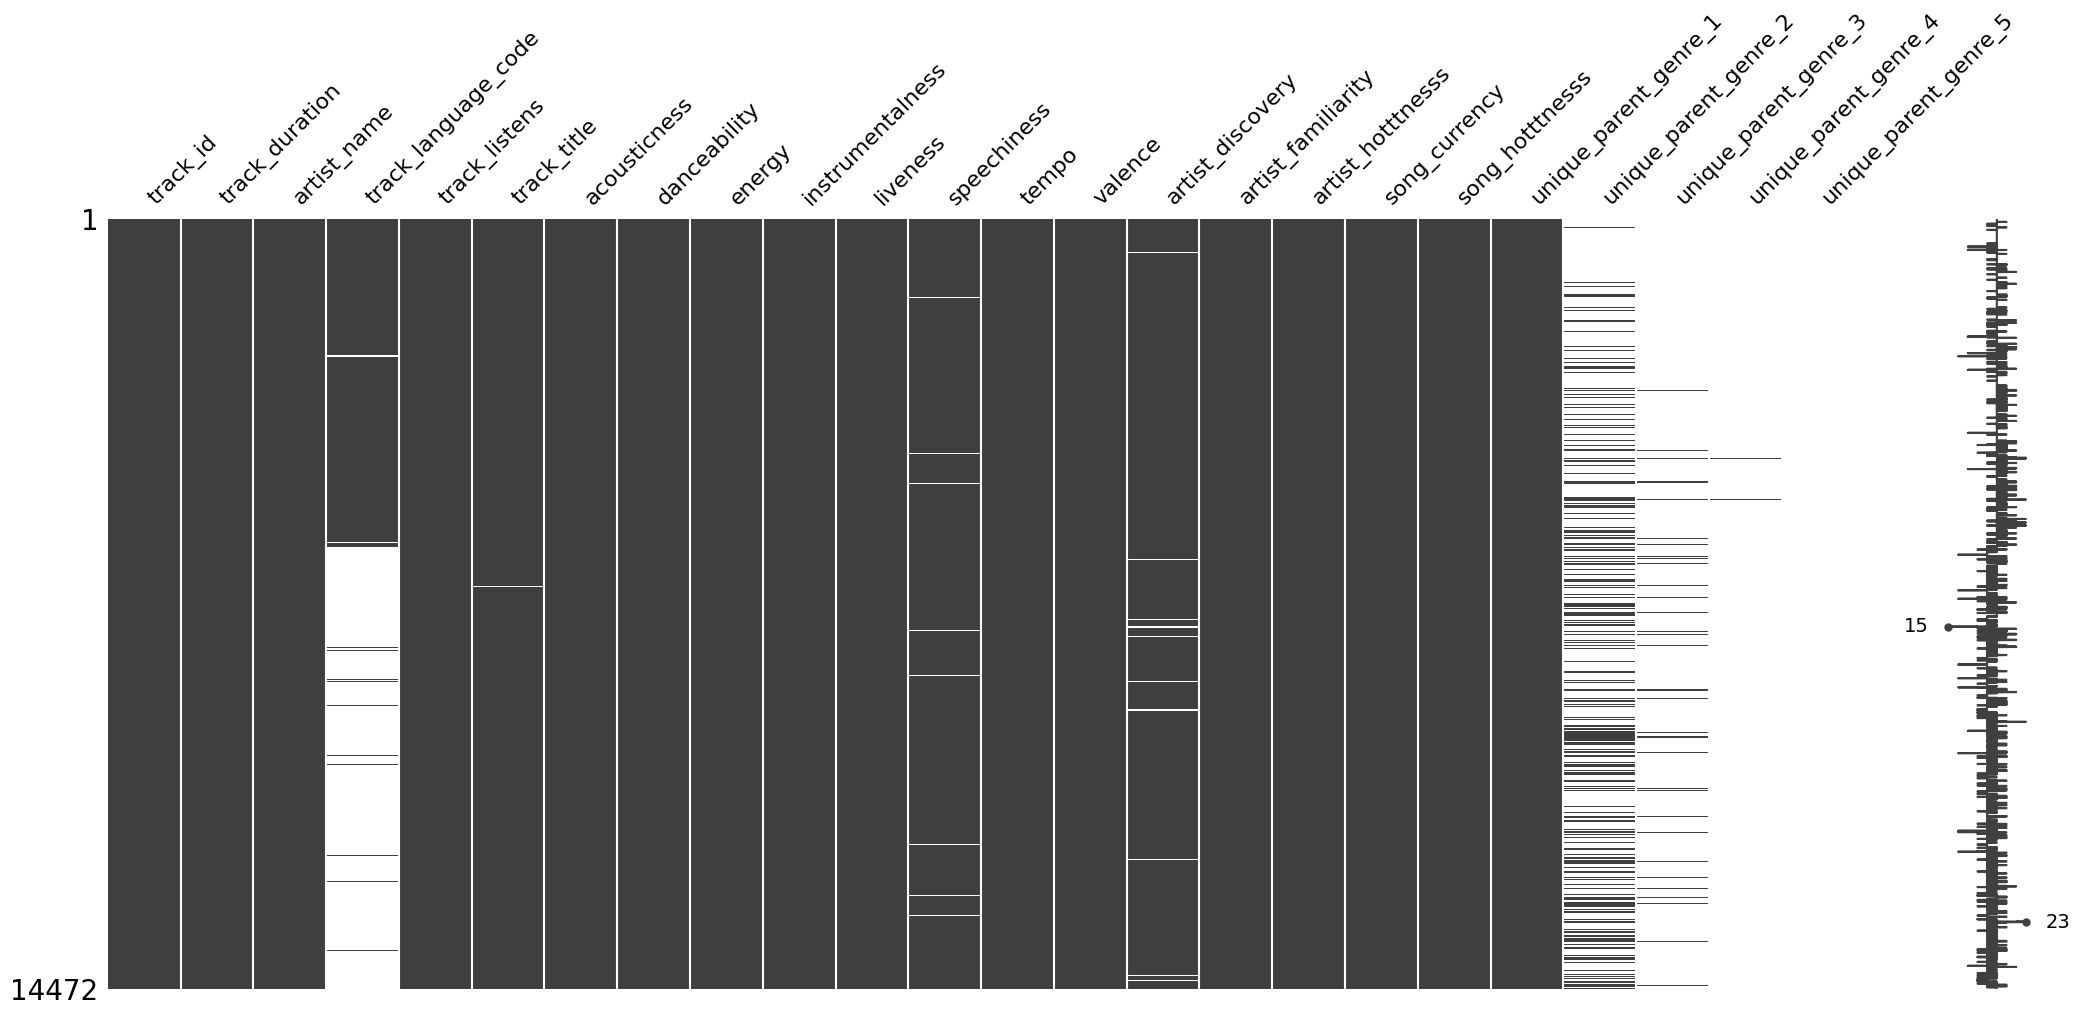

In [ ]:
# Find out the quantity of missing data on the merged dataset and each column's data types
msno.matrix(df_master_tidy)
plt.show()
missing_values = df_master_tidy.isna().sum()
missing_percentage = df_master_tidy.isna().mean() * 100
missing_percentage_str = missing_percentage.map(lambda x: f"{x:.2f}%")
data_type = df_master_tidy.dtypes
missing_data_summary = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage_str, 'Data Type': data_type})
print(missing_data_summary)

Now we find out 3 problems remians to be solved:
* There're a huge amount of missing values in "track_language_code" column;
* There're a few missing values in several echonest features;
* For most of the columns they're in incorrect data type.

Next let's fix them one by one.

We start on the problem of "track_language_code". Instead of simply dropping all the missing values, we analyzed the original dataset with the actual audio track on FMA website, then we relaized that the tracks without language code are the pure music track without lyrics. It make sense that they don't belong to any language! So we can replace those empty values by "Pure" which means they're non-verbal music tracks.

In [ ]:
# Re-categorize the tracks with no language code as "Pure" music
df_master_tidy.fillna({'track_language_code': 'Pure'}, inplace=True)

                       Missing Values Missing Percentage Data Type
track_id                            0              0.00%    object
track_duration                      0              0.00%    object
artist_name                         0              0.00%    object
track_language_code              8149             56.31%    object
track_listens                       0              0.00%     int64
track_title                         1              0.01%    object
acousticness                        0              0.00%    object
danceability                       26              0.18%    object
energy                              0              0.00%    object
instrumentalness                    0              0.00%    object
liveness                            0              0.00%    object
speechiness                       203              1.40%    object
tempo                               0              0.00%    object
valence                            28              0.19%    ob

Then our second problem, the missing values among echonest features. As the percentage of Null values in each columns is a very small proportion of the total dataset (less than 2%), and those missing values seems random rather than structured or reasonable missing, so we will move forward by dropping those tracks from our analysis.

In [ ]:
# Drop missing data rows of echonest features
df_master_tidy = df_master_tidy.dropna(subset=['speechiness','artist_discovery','valence','track_title'])

Lastly, we need to transform the datatype for each feature into correct type. To be specific, we need to convert all the echonest features into floats, and convert track duration into seconds for further analysis.

In [ ]:
# Transform data type of audio features and social features from string into float
df_master_tidy = df_master_tidy.copy()
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
social_features = ['artist_discovery', 'artist_familiarity', 'artist_hotttnesss','song_currency','song_hotttnesss']
df_master_tidy[audio_features] = df_master_tidy[audio_features].astype(float)
df_master_tidy[social_features] = df_master_tidy[social_features].astype(float)

# Define a function to convert "HH:MM:SS" or "MM:SS" to total seconds
def convert_duration_to_seconds(duration_str):
    if pd.isna(duration_str):
        return None  # Return None for NaN values
    try:
        # Convert to string and split into parts
        parts = list(map(int, duration_str.split(':')))

        # Determine seconds, minutes, and optionally hours
        if len(parts) == 2:  # Format: "MM:SS"
            minutes, seconds = parts
            hours = 0
        elif len(parts) == 3:  # Format: "HH:MM:SS"
            hours, minutes, seconds = parts
        else:
            return None  # Return None for incorrect format

        return hours * 3600 + minutes * 60 + seconds
    except (ValueError, AttributeError):
        return None  # Return None for values that are not in the correct format

# Apply the conversion function to the 'track_duration' column
df_master_tidy['track_duration_seconds'] = df_master_tidy['track_duration'].apply(convert_duration_to_seconds)
df_master_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14034 entries, 0 to 14471
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id                14034 non-null  object 
 1   track_duration          14034 non-null  object 
 2   artist_name             14034 non-null  object 
 3   track_language_code     14034 non-null  object 
 4   track_listens           14034 non-null  int64  
 5   track_title             14034 non-null  object 
 6   acousticness            14034 non-null  float64
 7   danceability            14034 non-null  float64
 8   energy                  14034 non-null  float64
 9   instrumentalness        14034 non-null  float64
 10  liveness                14034 non-null  float64
 11  speechiness             14034 non-null  float64
 12  tempo                   14034 non-null  float64
 13  valence                 14034 non-null  float64
 14  artist_discovery        14034 non-null  flo

Finally, now we have the ultimate master sheet ready for analysis!

In [ ]:
df_master_tidy.describe()

,track_listens,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,track_duration_seconds
count,14034.000000,1.403400e+04,14034.000000,14034.000000,14034.000000,14034.000000,14034.000000,14034.000000,14034.000000,14034.000000,14034.000000,14034.000000,14034.000000,14034.000000,14034.000000
mean,2101.118997,5.290025e-01,0.486292,0.537343,0.639466,0.188910,0.098075,123.397988,0.443037,0.327468,0.296302,0.355726,0.000237,0.033482,249.792148
std,9144.173287,3.813829e-01,0.188223,0.276061,0.360654,0.159550,0.137537,34.911562,0.275090,0.114720,0.134898,0.136884,0.001492,0.063172,207.390779
min,12.000000,9.035000e-07,0.051307,0.000020,0.000000,0.025297,0.022324,12.753000,0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,308.000000,1.118273e-01,0.345445,0.323733,0.325396,0.101927,0.036525,96.037500,0.202738,0.257225,0.210228,0.268718,0.000000,0.000000,158.000000
50%,696.000000,5.860155e-01,0.484620,0.548688,0.836094,0.119172,0.048121,120.186000,0.422583,0.335930,0.288913,0.352161,0.000000,0.000000,214.000000
75%,1705.000000,9.187833e-01,0.625606,0.770206,0.917175,0.212185,0.083498,145.765250,0.667015,0.420685,0.372443,0.462324,0.000098,0.043971,281.000000
max,543252.000000,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990,0.668120,0.819393,0.862303,0.052118,0.513594,3033.000000


## **Exploratory Data Analysis & Visualization**

Keeping in mind that our main focus of the analysis is to understand what factors could have potential impact on track listens, we aim to further study based on the following four factors that we hypothesize to influence track listens:
* Track Language / Verbal or Non-verbal
* Track Duration
* Track Genre
* Track Social Features

We first focus on the language artists used in every track to understand the potential role of language in audience behavior.

###**Part 1. Track Language**

####What's the track language distribution in our dataset?

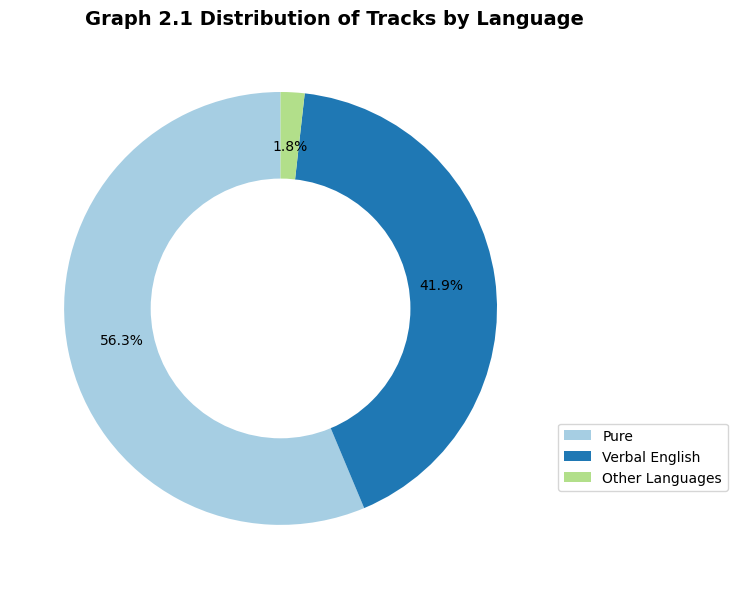

In [ ]:
# Convert language codes to full names
language_country_map = {
    'en': 'English',
    'es': 'Spanish',
    'pt': 'Portuguese',
    'fr': 'French',
    'tr': 'Turkish',
    'it': 'Italian',
    'ru': 'Russian',
    'sr': 'Serbian',
    'ar': 'Arabic',
    'el': 'Greek',
    'sw': 'Swahili',
    'ja': 'Japanese',
    'fa': 'Persian',
    'de': 'German',
    'fi': 'Finnish',
    'zh': 'Chinese',
    'cs': 'Czech',
    'ko': 'Korean',
    'bm': 'Bambara',
    'he': 'Hebrew'}
df_master_tidy['track_language_name'] = df_master_tidy['track_language_code'].map(language_country_map).fillna(df_master_tidy['track_language_code'])

# Count the occurrences of each language in the updated column
language_counts = df_master_tidy['track_language_name'].value_counts()
# Find the top 2 languages by count and aggregate the remaining languages as 'Other'
top_2_languages = language_counts.nlargest(2)
other_count = language_counts.iloc[2:].sum()
top_2_languages['Other'] = other_count

# Plot the pie chart with 'Other' category
plt.figure(figsize=(8, 6))
plt.pie(top_2_languages, labels=None, autopct='%1.1f%%', pctdistance=0.75, startangle=90, colors=plt.cm.Paired.colors)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add the labels for the top 2 languages and 'Other'
plt.legend(labels=['Pure', 'Verbal English', 'Other Languages'], bbox_to_anchor=(1, 0.3))
plt.title('Graph 2.1 Distribution of Tracks by Language', fontsize= 14, fontweight='bold', x=0.6, pad=10)
plt.tight_layout()
plt.show()

For the whole dataset, approximately 56.3% of the tracks contain no lyrics and are classified as “Pure” music. About 41.9% of the tracks have English lyrics, showing that English-language music dominates the portion of tracks with lyrics in our dataset. Only 1.8% of the tracks are written in other languages. To further analyze non-English tracks, another chart will be created to show the breakdown of tracks in languages other than English.

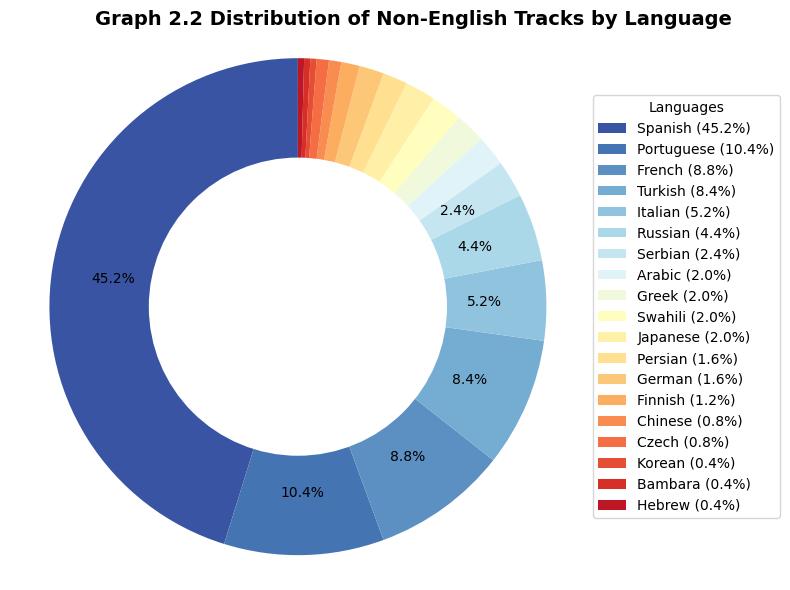

In [ ]:
# Exclude English Language and create a donut chart
non_english_counts = language_counts[(language_counts.index != 'English') & (language_counts.index != 'Pure')]
plt.figure(figsize=(8, 6))
colors = sns.color_palette("RdYlBu_r", n_colors=len(non_english_counts))
wedges, texts, autotexts = plt.pie(non_english_counts.values, colors=colors,
                                   autopct=lambda pct: f'{pct:.1f}%' if pct > 2 else '',
                                   pctdistance=0.75, startangle=90)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Graph 2.2 Distribution of Non-English Tracks by Language', x=0.7, fontsize= 14, fontweight='bold')
plt.axis('equal')

# Create a legend with language codes and percentages
legend_labels = [f'{lang} ({count/non_english_counts.sum()*100:.1f}%)' for lang, count in non_english_counts.items()]
plt.legend(wedges, legend_labels, title="Languages",loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

For tracks in languages other than English, the most common is Spanish, followed by Portuguese, French, and Turkish. All other languages make up only a small portion of the total. So we decide to compare only verbal tracks (including whatever languages) with non-verbal tracks (the "Pure" music) to see their impact on track listens.


####Verbal vs Pure, which category has larger amount of track listens?

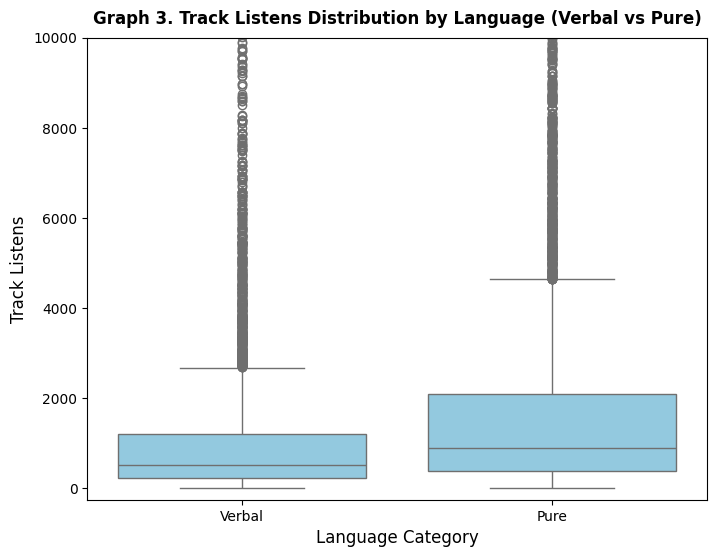

In [ ]:
# Create a new column indicating whether the language is 'pure' or 'other'
df_master_tidy['Language_Category'] = df_master_tidy['track_language_code'].apply(lambda x: 'Pure' if x == 'Pure' else 'Verbal')

# Create a box plot of track_listens for 'pure' vs. 'other' language tracks
plt.figure(figsize=(8, 6))
sns.boxplot(x='Language_Category', y='track_listens', data=df_master_tidy, color='skyblue')
plt.title('Graph 3. Track Listens Distribution by Language (Verbal vs Pure)', fontweight='bold', pad=10)
plt.xlabel('Language Category', fontsize=12)
plt.ylabel('Track Listens', fontsize=12)
plt.ylim(-250, 10000)
plt.show()

From the box plot above, we focus on the scale of total listens under 10k to see the box plot distribution better and we can see that the distribution of listens for pure tracks is more spread out, with a longer tail on the right side, indicating that there are some pure tracks with exceptionally high numbers of listens. There are several outliers (data points that fall outside of the whiskers) for both categories, but they are more prominent in the "verbal" category. The IQR, which represents the middle 50% of the data, is larger for pure tracks, suggesting that there is a greater variability in the number of listens for pure tracks within that range.
Based on the median and distribution, pure tracks tend to receive more listens overall than verbal tracks. The outliers in the "verbal" category might indicate that there are a few highly popular verbal tracks, but the overall trend suggests that pure tracks are generally more popular. Maybe it's because the pure tracks are easier to get adopted by other music artists.

###**Part 2. Track Duration**

Having delved into the linguistic landscape of the dataset, we now shift our attention to the temporal dimension of the tracks to see the whole distribution and the relationship with track listens in the dataset.

####What's the track duration distribution in our dataset?

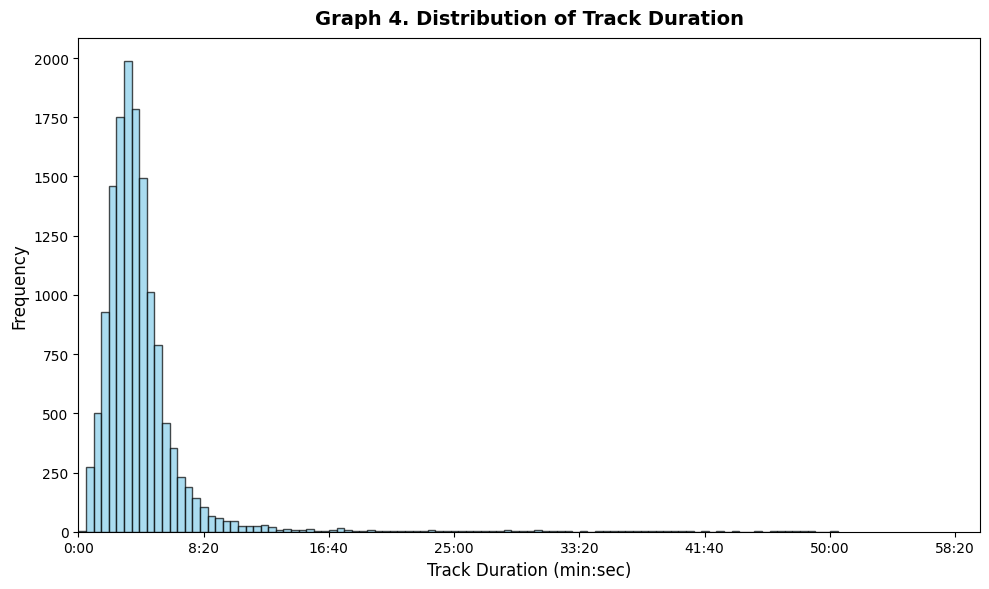

In [ ]:
# Define the function to convert seconds to minutes:seconds format
def sec_to_minsec(x, pos):
    mins = int(x // 60)
    secs = int(x % 60)
    return f'{mins}:{secs:02d}'

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_master_tidy['track_duration_seconds'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)

ax.set_xlabel('Track Duration (min:sec)', fontsize=12)
ax.set_xlim(0,3600)
ax.set_ylabel('Frequency', fontsize=12)
plt.title('Graph 4. Distribution of Track Duration', fontsize=14, fontweight='bold', pad=10)

# Format the x-axis to display min:sec format
ax.xaxis.set_major_formatter(ticker.FuncFormatter(sec_to_minsec))

plt.tight_layout()
plt.show()

The Graph 4 histogram reveals a right-skewed distribution, indicating that most tracks have a relatively short duration, with a smaller number of tracks extending to longer lengths. The frequency distribution peaks around the 0:12 - 8:20 minute range, suggesting that a significant portion of tracks fall within this duration. The longer tail on the right side indicates the presence of some tracks with exceptionally long durations, though these are less frequent.


####What's the correlation between the track duration and track listens?

To minimize the impact of outliers, we can filter the duration data to only include values between the IQR.

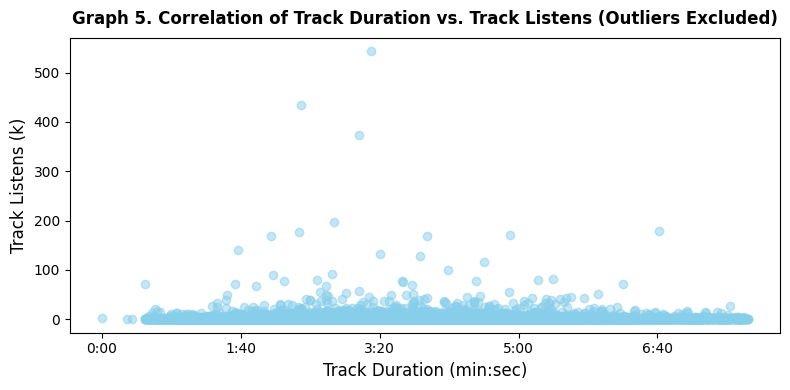

In [ ]:
# Filter the data to only include values between the whiskers
q1 = df_master_tidy['track_duration_seconds'].quantile(0.25)
q3 = df_master_tidy['track_duration_seconds'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

subset_track_durations = df_master_tidy[(df_master_tidy['track_duration_seconds'] >= lower_bound) &
                                         (df_master_tidy['track_duration_seconds'] <= upper_bound)]

# Scatter plot visualization
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(subset_track_durations['track_duration_seconds'],
           subset_track_durations['track_listens'] / 1000, color='skyblue', alpha=0.5)

# Set labels and titles
ax.set_xlabel('Track Duration (min:sec)', fontsize=12)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(sec_to_minsec))  # Reuse the same function here
ax.set_ylabel('Track Listens (k)', fontsize=12)
plt.title('Graph 5. Correlation of Track Duration vs. Track Listens (Outliers Excluded)', fontweight='bold', pad=10)

plt.tight_layout()
plt.show()


The scatter plot above illustrates the relationship between track duration and track listens only including the values between the lower and upper whiskers in the box plot. The exclusion of outliers has likely provided a clearer view of the general trend, as outliers can obscure the underlying relationship.


However, there appears to be a weak positive correlation between track duration and track listens. Some tracks with over 100k listens are relatively short, while others are quite long. This suggests that track duration alone is not a definitive factor in determining track popularity.


###**Part 3. Track Genre**

Next, we aim to analyze how a track's genre affects its number of listens. However, we first need to address an issue with genre counts. In the df_master_tidy dataset, each track can be associated with multiple genres, complicating the calculation of genre distribution. To simplify this, we created a new master sheet where each genre is listed in a separate row, allowing for possible duplicate track IDs.

In [ ]:
df_master_2 = df_master_tidy.melt(id_vars= df_master_tidy.iloc[:, 0:19],
                                  value_vars= ['unique_parent_genre_1','unique_parent_genre_2','unique_parent_genre_3','unique_parent_genre_4',
                                  'unique_parent_genre_5'], var_name='parent_genre_number', value_name='parent_genre_title')
df_master_2.dropna(subset=['parent_genre_title'], inplace=True)
df_master_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19034 entries, 0 to 68946
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             19034 non-null  object 
 1   track_duration       19034 non-null  object 
 2   artist_name          19034 non-null  object 
 3   track_language_code  19034 non-null  object 
 4   track_listens        19034 non-null  int64  
 5   track_title          19034 non-null  object 
 6   acousticness         19034 non-null  float64
 7   danceability         19034 non-null  float64
 8   energy               19034 non-null  float64
 9   instrumentalness     19034 non-null  float64
 10  liveness             19034 non-null  float64
 11  speechiness          19034 non-null  float64
 12  tempo                19034 non-null  float64
 13  valence              19034 non-null  float64
 14  artist_discovery     19034 non-null  float64
 15  artist_familiarity   19034 non-null  floa

####What are the audio feature characteristics for different music genres?

Since music genres are defined by their audio features, it's essential to first understand the key audio characteristics of each genre.

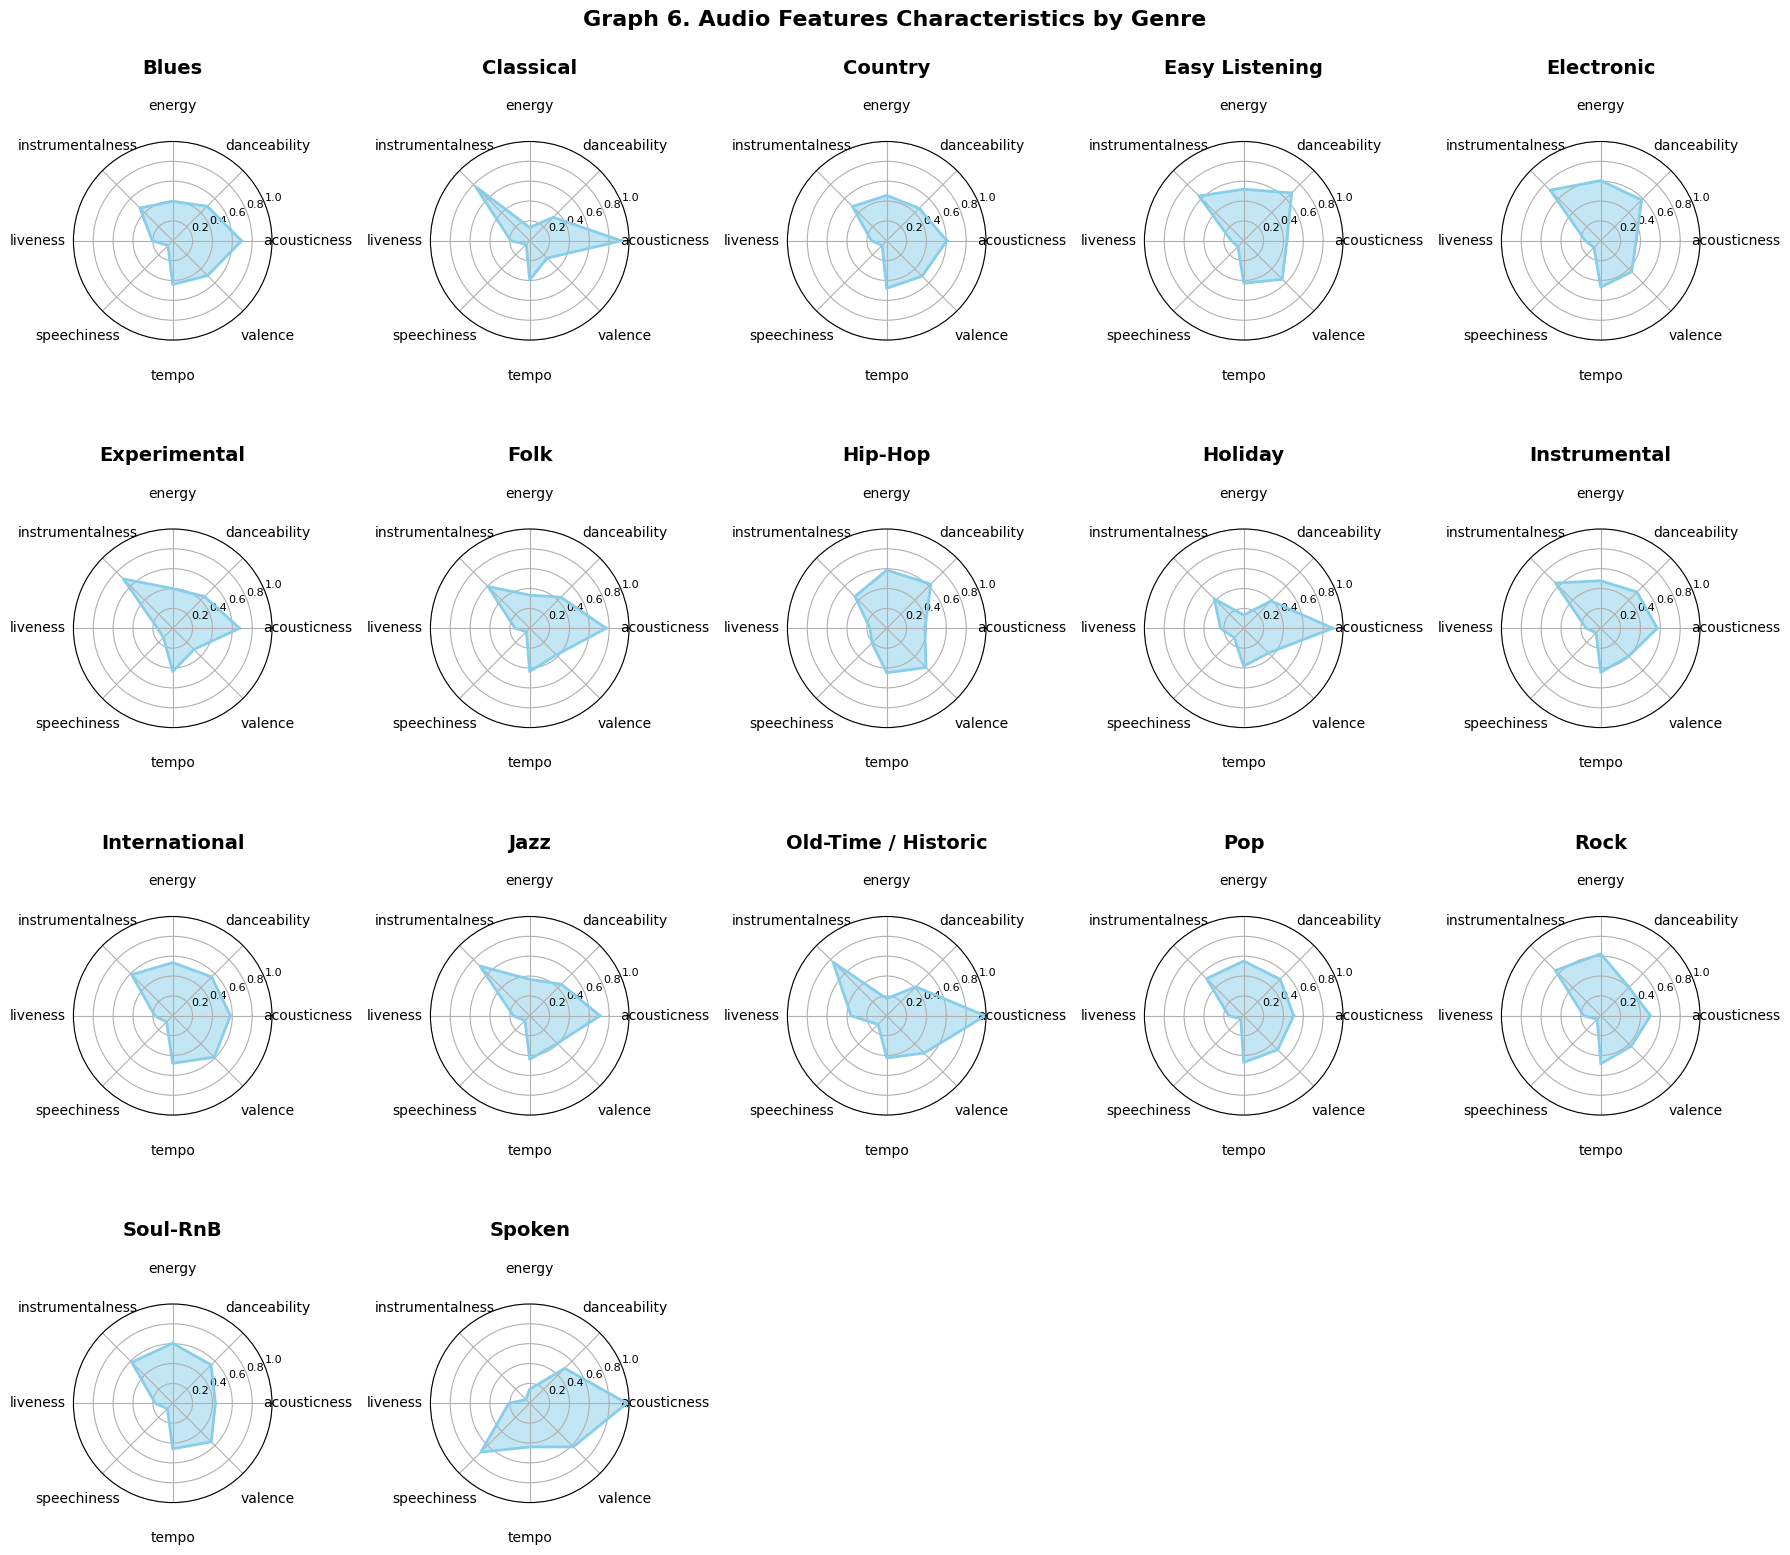

In [ ]:
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
scaler = MinMaxScaler()
df_master_2[audio_features] = scaler.fit_transform(df_master_2[audio_features])

# Define a function to create radar chart with fixed scale
def create_radar_chart(ax, genre, features, stats):
    num_vars = len(features)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    stats = np.concatenate((stats, [stats[0]]))
    angles += angles[:1]
    ax.fill(angles, stats, color='skyblue', alpha=0.5)
    ax.plot(angles, stats, color='skyblue', linewidth=2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features)
    ax.tick_params(axis='x', labelsize=10, pad=15)
    ax.tick_params(axis='y', labelsize=8)
    ax.set_title(genre, size=14, color='black', fontweight='bold', y=1.3)
    ax.set_ylim(0, 1)

genre_feature_means = df_master_2.groupby('parent_genre_title')[audio_features].mean()

# Subplots for radar charts
num_genres = len(genre_feature_means)
num_cols = 5
num_rows = (num_genres + num_cols - 1) // num_cols
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4), subplot_kw=dict(polar=True))
axs = axs.flatten()

# Radar charts for each genre
for i, genre in enumerate(genre_feature_means.index):
    stats = genre_feature_means.loc[genre].values
    create_radar_chart(axs[i], genre, audio_features, stats)

# Remove empty subplots if the grid is not fully filled
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle('Graph 6. Audio Features Characteristics by Genre', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Graph 6 shows the radar charts for the 8 audio features distribution across 17 genres. Each radar chart visualizes how different audio features are distributed for a specific genre. In general, most genres have strong instrumentalness and low speechiness except for the Spoken genre as we can assume these two features are negatively correlated. We can also see that genres like Electronic, Hip-Hop, and Rock are characterized by higher danceability and energy, while genres like Classical, Instrumental, Jazz, and Old-Time/Historic are more acoustic and instrumental. These radar charts provide us with a quick understanding of distinctive genre audio features.


#### What is the distribution of music genres in tracks?

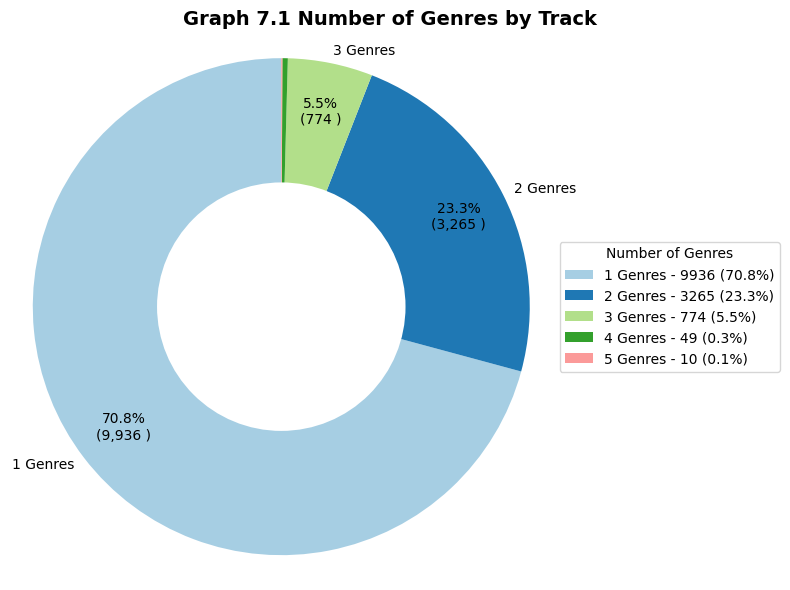

In [ ]:
# Count the number of genres each track has
df_master_tidy.loc[:, 'genre_count'] = 1
for i in range(2, 6):
    df_master_tidy.loc[:, 'genre_count'] += df_master_tidy[f'unique_parent_genre_{i}'].notna()
genre_distribution = df_master_tidy['genre_count'].value_counts().sort_index()

# Visualize the genre numbers distribution of tracks
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(genre_distribution, labels=[f'{i} Genres' if i in [1, 2, 3] else '' for i in genre_distribution.index],
    colors=plt.cm.Paired.colors, autopct=lambda pct: f'{pct:.1f}%\n({int(pct * genre_distribution.sum() / 100):,} )' if pct > 2 else '',
    startangle=90, textprops={'color': 'black'}, pctdistance=0.8, labeldistance=1.05)
center_circle = plt.Circle((0, 0), 0.50, fc='white')
plt.gca().add_artist(center_circle)
plt.legend(wedges,[f'{i} Genres - {genre_distribution[i]} ({genre_distribution[i] / genre_distribution.sum() * 100:.1f}%)'
     for i in genre_distribution.index], title="Number of Genres", loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)
plt.title('Graph 7.1 Number of Genres by Track', fontsize=14, fontweight='bold', x=0.7)
plt.axis('equal')
plt.tight_layout()
plt.show()

With a basic understanding of the unique combination of audio features for each genres, we want to explore genre diversity and track classification. In Graph 7.1, the donut chart displays the distribution of tracks by the number of genres they belong to. We can see that most of the tracks in the dataset, around 70%, only belong to a single genre, and 23% of the tracks belong to 2 genres. Tracks with three or more genres are relatively rare, implying that track classification is typically straightforward with only a small portion of the tracks with genre overlaps.


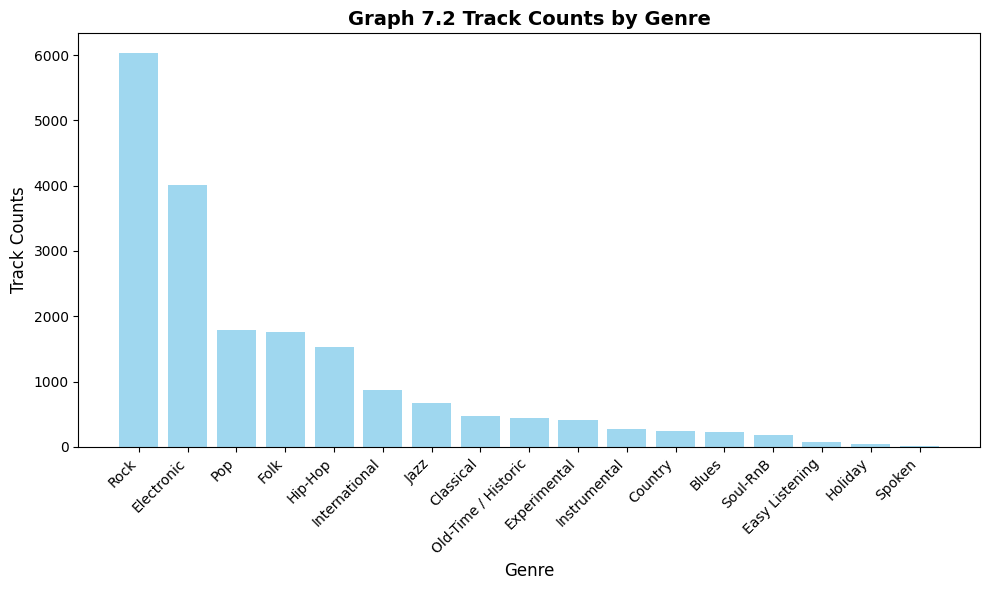

In [ ]:
# Count the number of tracks each genre has
genre_track_count = df_master_2.groupby('parent_genre_title')['track_id'].count().sort_values(ascending= False).reset_index()

# Visualize the track numbers distribution of each genre
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(genre_track_count['parent_genre_title'],genre_track_count['track_id'], color='skyblue', alpha=0.8)
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Track Counts', fontsize=12)
ax.set_xticks(range(len(genre_track_count['parent_genre_title'])))
ax.set_xticklabels(genre_track_count['parent_genre_title'], rotation=45, ha='right')
plt.title('Graph 7.2 Track Counts by Genre', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()

After analyzing the number of genres associated with tracks in Graph 7.1, we now move on to explore how many tracks are present in each genre category. In Graph 7.2, the x-axis represents the 17 genres in our dataset, and the y-axis represents the track counts. The bars represent the track count of each genre.

We can see that Rock and Electronic are the dominant genres with over 4000 tracks each, possibly reflecting their popularity or availability. Pop, Folk, and Hip-hop also show notable representation with over 1500 tracks each. The rest of the genres have lesser representation in the track counts with less than 1000 tracks individually. Although they are relatively less common in the dataset, they reflect the diversity of genres.  


####Which genre is the most popular genre in our dataset?


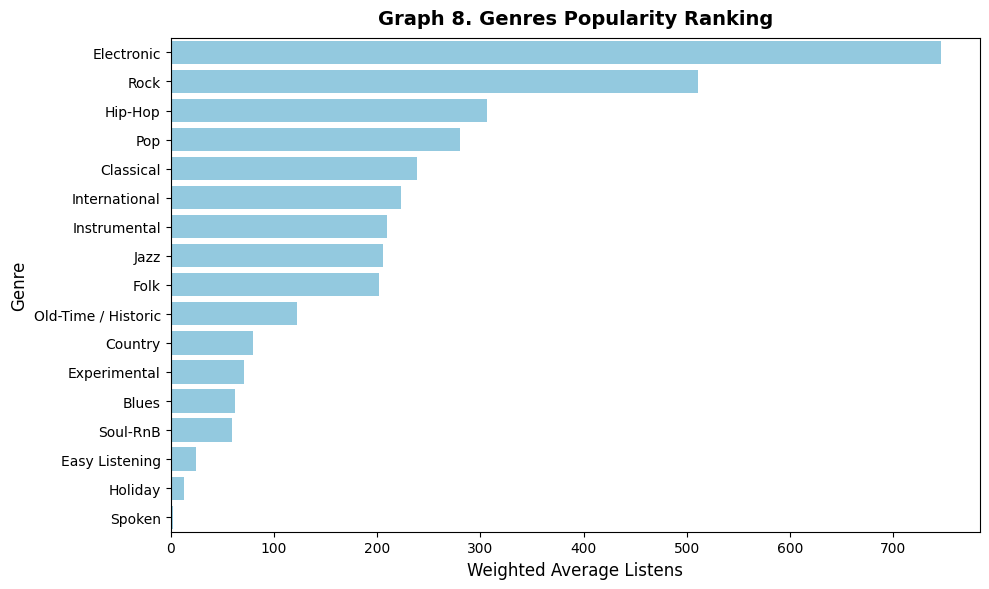

In [ ]:
# Calculate the weighted average tracks listens for each genre
genres = df_master_2['parent_genre_title'].unique()
weighted_avg_per_genre = {}
total_tracks = df_master_tidy['track_id'].nunique()
for genre in genres:
    genre_data = df_master_2[df_master_2['parent_genre_title'] == genre]
    genre_weight = len(genre_data) / total_tracks
    genre_avg_listens = genre_data['track_listens'].mean()
    weighted_avg = float(genre_weight * genre_avg_listens)
    weighted_avg_per_genre[genre] = weighted_avg
df_weighted_avg = pd.DataFrame(list(weighted_avg_per_genre.items()), columns=['Genre', 'Weighted_Avg'])
df_weighted_avg = df_weighted_avg.sort_values(by='Weighted_Avg', ascending=False)

# Visualize the ranking of genres popularity
plt.figure(figsize=(10, 6))
sns.barplot(x='Weighted_Avg', y='Genre', data=df_weighted_avg, color='skyblue')
plt.title('Graph 8. Genres Popularity Ranking', fontsize=14, fontweight='bold', pad=10)
plt.xlabel('Weighted Average Listens', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.show()

Following the analysis of Graph 7.1 and Graph 7.2, Graph 8 provides deeper insight into genre popularity based on the weighted average listens. The x-axis represents weighted average listen counts for each genre, and the y-axis represents the 17 genres. The bars show the weighted average of listens.

We used the weighted average instead of the simple average for the track listens calculation because the track counts for each genre vary significantly as shown in Graph 7.2. Using a simple average would disproportionately favor genres with more tracks like Rock and Electronic. By considering the track count as a factor, the weighted average accounts for both the track counts and the listens, providing a more balanced view of genre popularity.

Similar to Graph 7.2, Electronic and Rock stand out as the leading genres in Graph 8. Especially, Electronic dominates the chart by a substantial margin with a weighted average of over 350 listens. Rock follows behind with the second-highest listens over 200. Although Instrumental and Classical do not show substantial representation in Graph 7.2 for the track counts, they rank highly in terms of listens in Graph 8.


####What are the top 10 tracks for highest listens in the dataset?

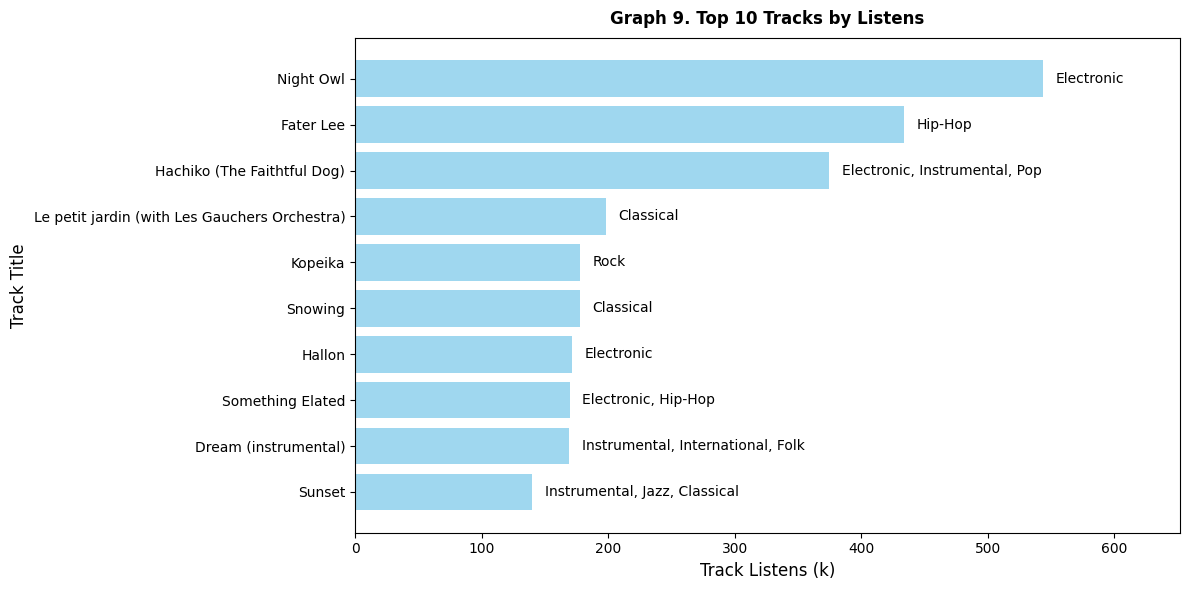

In [ ]:
# Visualize the TOP 10 Tracks with most track listens
df_master_tidy['combined_genres'] = df_master_tidy[['unique_parent_genre_1', 'unique_parent_genre_2', 'unique_parent_genre_3', 'unique_parent_genre_4',
                                                    'unique_parent_genre_5']].apply(lambda row: ', '.join(row.dropna()), axis=1)
top10_tracks_with_genres = df_master_tidy[['track_listens', 'track_title', 'combined_genres']]\
                          .nlargest(10, 'track_listens').sort_values(by='track_listens', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(top10_tracks_with_genres['track_title'], top10_tracks_with_genres['track_listens']/1000, color='skyblue', alpha=0.8)
ax.set_xlabel('Track Listens (k)', fontsize=12)
ax.set_ylabel('Track Title', fontsize=12)
plt.title('Graph 9. Top 10 Tracks by Listens', fontweight='bold', pad=10)
plt.gca().invert_yaxis()
ax.set_xlim([0, (top10_tracks_with_genres['track_listens']/1000).max() * 1.2])

# Annotate the bars with genres
for bar, genre in zip(bars, top10_tracks_with_genres['combined_genres']):
    ax.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, genre,
            va='center', fontsize=10, color='black')
plt.tight_layout()
plt.show()

Graph 9 displays the top 10 tracks ranked by the number of listens. The x-axis represents the total number of listens per track, and the y-axis lists the track titles in descending order of listens. Each bar visualizes the track’s listen count, with its corresponding genre(s) labeled.

The top 3 tracks, “Night Owl,” “Fater Lee,” and “Hachiko (The Faithful Dog),” stand out significantly, each surpassing 300k listens. In contrast, the remaining 7 tracks range between 100k and 200k listens, highlighting a noticeable gap between the top 3 tracks and the rest.

As observed in Graph 8, Electronic ranks as the most popular genre, and the dominance is also reflected in Graph 9, with four of the top 10 tracks, “Night Owl”, “Hachiko (The Faithful Dog),” “Hallon,” and “Something Elated,” belonging to the Electronic genre. This reinforces Electronic’s widespread popularity.

Therefore, we are particularly interested in analyzing how the audio features of these four Electronic tracks compare to the average features of the Electronic genre, providing further insight into what makes these tracks more popular among listeners.

#### How does those four tracks stand out?

Average audio feature means for 'Electronic' genre:
acousticness        0.356475
danceability        0.581879
energy              0.606247
instrumentalness    0.720341
liveness            0.154742
speechiness         0.095644
tempo               0.467647
valence             0.440583
Name: Electronic, dtype: float64


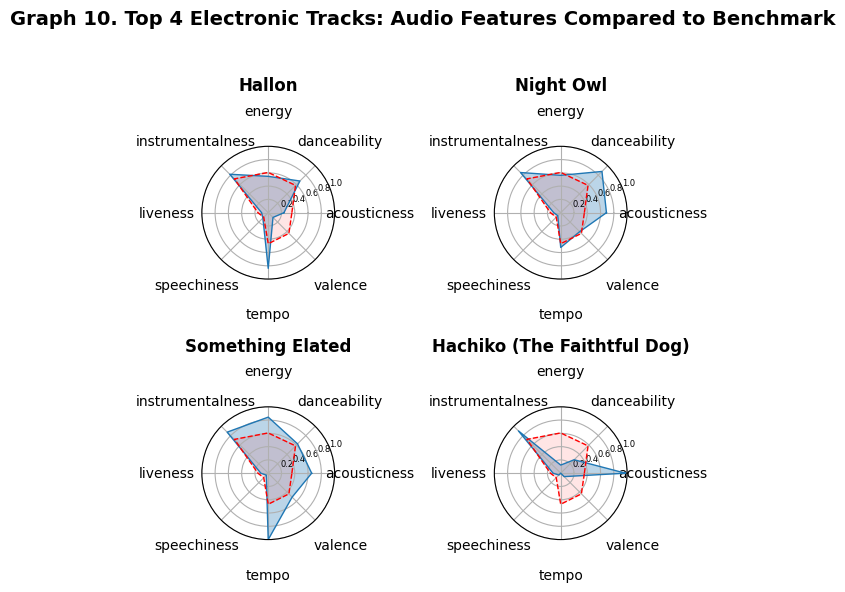

In [ ]:
# Create the subset for the four standing out tracks from Electronic genre
track_title_to_find = ['Night Owl', 'Hachiko (The Faithtful Dog)', 'Hallon', 'Something Elated']
data = df_master_tidy.loc[df_master_tidy['track_title'].isin(track_title_to_find)]

# Assuming 'Electronic' is the correct genre name, check if it's available in genre_feature_means
if 'Electronic' in genre_feature_means.index:
    electronic_mean = genre_feature_means.loc['Electronic']
    print("Average audio feature means for 'Electronic' genre:")
    print(electronic_mean)
else:
    print("'Electronic' genre not found in the dataset.")
    electronic_mean = None
electronic_mean_values = electronic_mean.values.tolist() if electronic_mean is not None else [0] * 8
df = pd.DataFrame(data)

# Scale 'tempo' to be between 0 and 1 like other features
df['tempo'] = (df['tempo'] - df['tempo'].min()) / (df['tempo'].max() - df['tempo'].min())
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
num_tracks = len(df)

# Set up the figure for multiple radar charts
fig, axs = plt.subplots(2, 2, figsize=(6, 6), subplot_kw=dict(polar=True))
axs = axs.flatten()
angles = np.linspace(0, 2 * np.pi, len(audio_features), endpoint=False).tolist()
angles += angles[:1]
mean_values = electronic_mean_values + electronic_mean_values[:1]

# Loop through each track and add to the radar chart, plotting each track
for i, (index, row) in enumerate(df.iterrows()):
    track_title = row['track_title']
    feature_values = row[audio_features].tolist()
    feature_values += feature_values[:1]
    ax = axs[i]
    ax.set_ylim(0, 1)
    ax.plot(angles, feature_values, linewidth=1, linestyle='solid', label=track_title)
    ax.fill(angles, feature_values, alpha=0.3)
    ax.plot(angles, mean_values, linewidth=1, linestyle='dashed', color='r', label='Electronic Mean')
    ax.fill(angles, mean_values, color='r', alpha=0.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(audio_features)
    ax.tick_params(axis='x', labelsize=10, pad=15)
    ax.tick_params(axis='y', labelsize=6)
    ax.set_title(track_title, size=12, fontweight='bold', pad=10)
plt.suptitle('Graph 10. Top 4 Electronic Tracks: Audio Features Compared to Benchmark', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Graph 10 compares the audio features of the top 4 Electronic tracks against the genre’s average benchmark, represented by the red dashed line. The radar charts illustrate the eight audio features: energy, danceability, acoustiness, valence, tempo, speechiness, liveness, and instrumentalness.

Among these four tracks, we can observe that “Night Owl,” “Hallon,” and “Something Elated” display a pattern more closely aligned with the average benchmark, in contrast to “Hachiko (The Faithful Dog)”. This aligns with their genre classification: while “Night Owl” and “Hallon” belong exclusively to the Electronic genre, “Something Elated” blends Electronic and Hip-Hop influences, and “Hachiko (The Faithful Dog)” spans Electronic, Instrumental, and Pop.

Aside from “Hachiko (The Faithful Dog),” we noticed that intstrumentalness, danceability and tempo for the other three tracks are generally higher than the benchmark. This raises the question of whether these audio features contribute to their higher listen counts compared to other tracks in the Electronic genre. To explore this further, we will analyze the correlation between listens and audio features in the next section.


#### How do the different audio features interact with and affect each other?

Before we enter into the correlation analysis, there's a scaling problem we found out. Let's check out the distribution of track listens firstly.

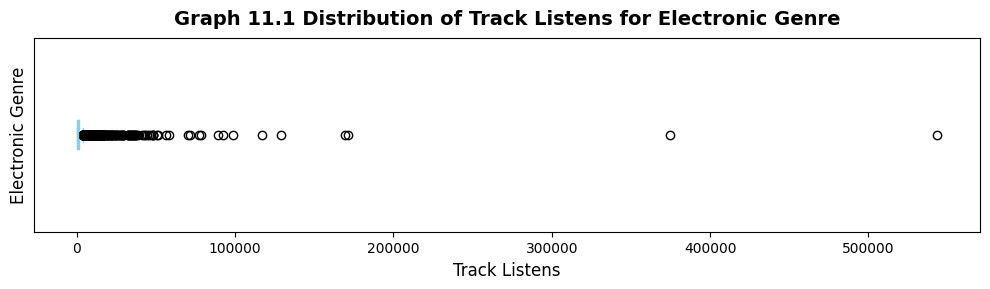

In [ ]:
# Check the distribution of track listens for Electronic Genre
electronic = df_master_2[df_master_2['parent_genre_title']=='Electronic']
electronic['track_listens'].plot(kind='box', figsize=(10,3), vert=False, color='skyblue', patch_artist=True)
plt.title('Graph 11.1 Distribution of Track Listens for Electronic Genre', fontsize=14, fontweight='bold', pad=10)
plt.xlabel('Track Listens', fontsize=12)
plt.ylabel('Electronic Genre', fontsize=12)
plt.yticks([])
plt.tight_layout()
plt.show()

This box plot illustrates the distribution of track listens within the Electronic music genre. Most tracks are clustered in a relatively low range, as indicated by the dense grouping on the left. The distribution is highly skewed, with the majority of tracks having fewer than 1,000 listens, while a few outliers exceed 50,000, reaching up to 350,000 listens. These outliers significantly distort the analysis. Given that all Echonest features are scaled between 0 and 1, while "track_listens" represents large integers, the correlations between them may not be immediately evident. To better explore potential relationships, we can apply a logarithmic transformation to "track_listens" and then reassess the correlations.

Text(0.5, 1.0, 'Graph 11.2 Electronic Music Features Correlation Matrix Heatmap')

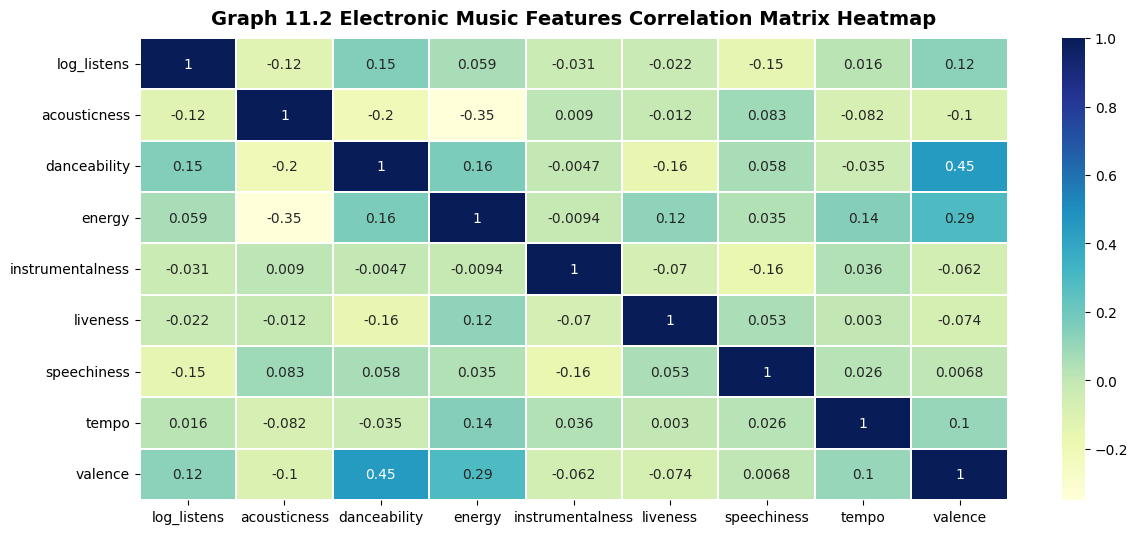

In [ ]:
# Create the heatmap
electronic = electronic.copy()
electronic['log_listens'] = np.log(electronic['track_listens'])
dependance = ['log_listens']
FMA_Music_Analysis = electronic[dependance + audio_features]
FMA_Music_Analysis_matrix = FMA_Music_Analysis.corr()
plt.figure(figsize=(14, 6))
sns.heatmap(data=FMA_Music_Analysis_matrix, annot=True,linewidths=.2, cmap="YlGnBu")
plt.title("Graph 11.2 Electronic Music Features Correlation Matrix Heatmap", fontsize=14, fontweight='bold', pad=10)

The correlation heatmap above reveals that most audio features show relatively weak correlations with "track_listens", indicating limited linear relationships between these features and the number of listens.

However, "danceability" and "valence" display relatively stronger positive correlations with "track_listens," suggesting that tracks in the Electronic genre with higher "danceability" and "valence" may attract more listens. In contrast, "acousticness" and "speechiness" exhibit stronger negative correlations, implying that these features might reduce a track's popularity in this genre.

Additionally, "danceability" and "valence" themselves show a notably strong correlation with each other, which may warrant further investigation.

In [ ]:
# Try the LinearRegression to modelize the audio feature correlations
X=electronic[audio_features]
y=electronic['log_listens']
model = LinearRegression().fit(X, y)

# Splitting the dataset into train and test. 30% of the whole data is for testing
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)
train_df = x_train.join(y_train)
predictors = x_train.columns
formula = 'log_listens~ ' + ' + '.join(predictors)
Rating_lm = sm.ols(formula=formula, data=train_df).fit()
print(Rating_lm.summary())

                            OLS Regression Results                            
Dep. Variable:            log_listens   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     22.81
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           4.56e-34
Time:                        20:50:18   Log-Likelihood:                -4587.5
No. Observations:                2803   AIC:                             9193.
Df Residuals:                    2794   BIC:                             9246.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.5049      0.142  

The regression results show an R-squared score of 0.062, meaning the model explains only 6.2% of the variation in track listens. This indicates that the model does not fit the dataset well. This further confirms that the relationship between audio features and track listens is not linear, suggesting the need for more advanced machine learning methods to uncover potential underlying patterns in the future.

####How strong is the relationship between the two audio features - Danceability and Valence?

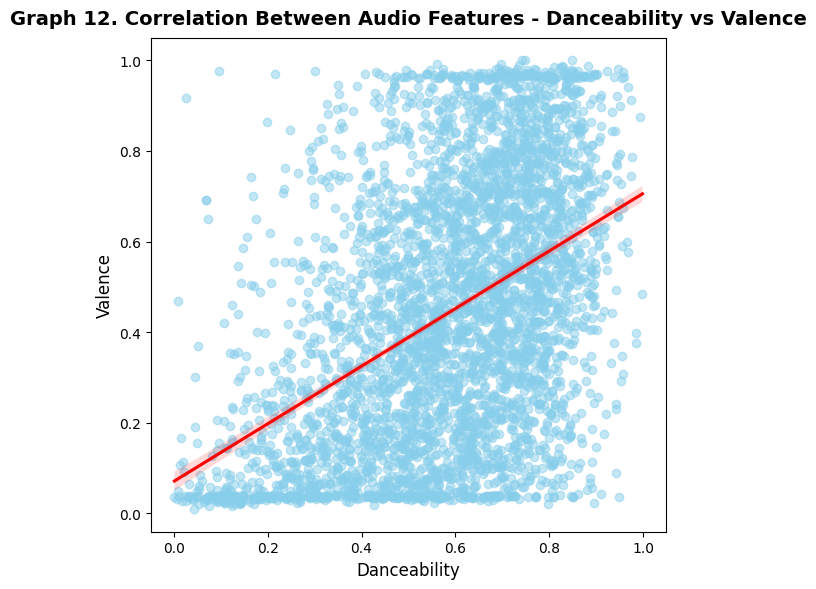

In [ ]:
# Visulize the correlation between Danceability and Valence
plt.figure(figsize=(6, 6))
sns.regplot(x=electronic['danceability'],y=electronic['valence'],line_kws={"color": "red"}, scatter_kws={"color": "skyblue", "alpha": 0.5})
plt.title('Graph 12. Correlation Between Audio Features - Danceability vs Valence', fontsize=14, fontweight='bold', pad=10)
plt.xlabel('Danceability', fontsize=12)
plt.ylabel('Valence', fontsize=12)
plt.tight_layout()
plt.show()

We observe a strong positive correlation between "danceability" and "valence". The graph above illustrates that in electronic music, tracks with higher danceability tend to be perceived as more positive or uplifting. Each blue dot represents a track, and the distribution shows that as danceability increases, so does valence. The red regression line highlights this trend, with the upward slope indicating a positive correlation, which means more danceable tracks are generally associated with a happier or more positive tone. This scatterplot visually confirms that as music becomes more danceable, it is often more uplifting or pleasurable.

###**Part 4. Track Social Feature**

Last but not least, we want to analyze the social features of each track. Our dataset includes five social features: three related to artist recognition—"artist discovery," "artist familiarity," and "artist hotness"—and two related to song popularity—"song currency" and "song hotness".

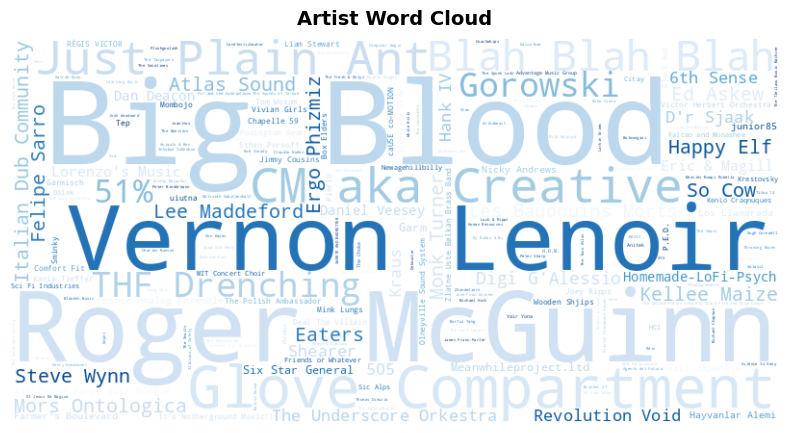

In [ ]:
artist_counts = Counter(df_master_tidy['artist_name'])
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='Blues').generate_from_frequencies(artist_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Artist Word Cloud', fontsize=14, fontweight='bold', pad=10)
plt.show()

####Does the artist social recognition have impact on track listens?

Let's compare the social features of the top 5 artists with the most listens against the dataset average to identify any trends or patterns.

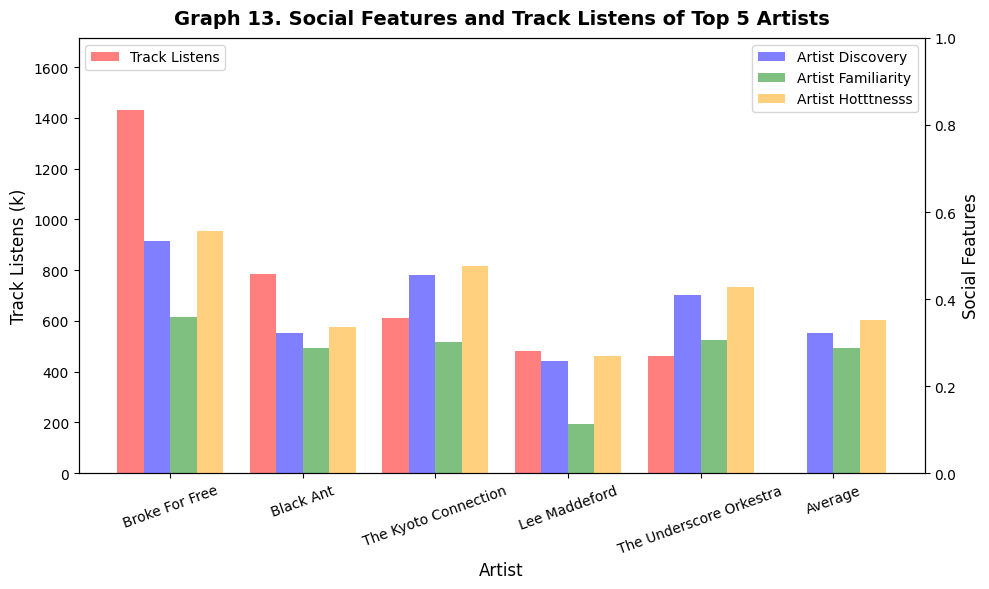

In [ ]:
artist_info = df_master_tidy[['artist_name', 'artist_discovery', 'artist_familiarity', 'artist_hotttnesss', 'track_listens']]
top5_listen = artist_info.groupby(['artist_name','artist_discovery', 'artist_familiarity', 'artist_hotttnesss'])['track_listens']\
              .sum().nlargest(5).reset_index()
avg_discovery = artist_info.drop_duplicates(subset = 'artist_name')['artist_discovery'].mean()
avg_familiarity = artist_info.drop_duplicates(subset = 'artist_name')['artist_familiarity'].mean()
avg_hotttnesss = artist_info.drop_duplicates(subset = 'artist_name')['artist_hotttnesss'].mean()
avg_listens_by_artist = artist_info.groupby('artist_name')['track_listens'].mean().mean()
top5_listen.loc[-1] = ['Average', avg_discovery, avg_familiarity, avg_hotttnesss, avg_listens_by_artist]
top5_listen = top5_listen.reset_index(drop=True)
fig, ax1 = plt.subplots(figsize=(10, 6))
bar_width = 0.2
positions = np.arange(len(top5_listen))

# Plot track listens on the left
ax1.bar(positions, top5_listen['track_listens']/1000, bar_width, label='Track Listens', color='red', alpha=0.5)
ax1.set_xlabel('Artist', fontsize=12)
ax1.set_ylabel('Track Listens (k)', fontsize=12)
ax1.set_xticks(positions + 1.5 * bar_width)
ax1.set_xticklabels(top5_listen['artist_name'], rotation=20, ha='center')
ax1.set_ylim(0, (top5_listen['track_listens']/1000).max() *1.2)
ax1.legend(loc='upper left')

# Plot Discovery, Familiarity, Hotttnesss on the left
ax2 = ax1.twinx()
ax2.bar(positions + bar_width, top5_listen['artist_discovery'], bar_width, label='Artist Discovery', color='blue', alpha=0.5)
ax2.bar(positions + bar_width*2, top5_listen['artist_familiarity'], bar_width, label='Artist Familiarity', color='green', alpha=0.5)
ax2.bar(positions + bar_width*3, top5_listen['artist_hotttnesss'], bar_width, label='Artist Hotttnesss', color='orange', alpha=0.5)
ax2.set_ylabel('Social Features', fontsize=12)
ax2.set_ylim(0, 1)
ax2.legend(loc='upper right')
plt.title('Graph 13. Social Features and Track Listens of Top 5 Artists', fontsize=14, fontweight='bold', pad=10)
plt.tight_layout()
plt.show()

The graph 13 "Social Features and Track Listens of Top 5 Artists" illustrates how various social features correlate with total track listens. For artists like Broke For Free, these social features, particularly Discovery, are strong indicators of their extensive reach and engagement with new listeners, as reflected in their high track listen counts. The comparative bar graph highlights Broke For Free’s significant presence, followed by Black Ant and The Kyoto Connection, who also show strong familiarity scores. The track listens emphasize that artists with higher Discovery and Familiarity scores tend to have increased listens.

This trend is also supported by other research showing that music discovery, especially through social media platforms, drives artist visibility and listener engagement​. Additionally, the Hotttnesss metric developed by The Echo Nest plays a crucial role in determining an artist's current popularity, factoring in streaming data and social media mentions, which directly influence how often their music is played​.



####What's the relationship between song currency and song hotness?

Quadratic Function: y = 0.114x^2 + -0.015x + 0.000


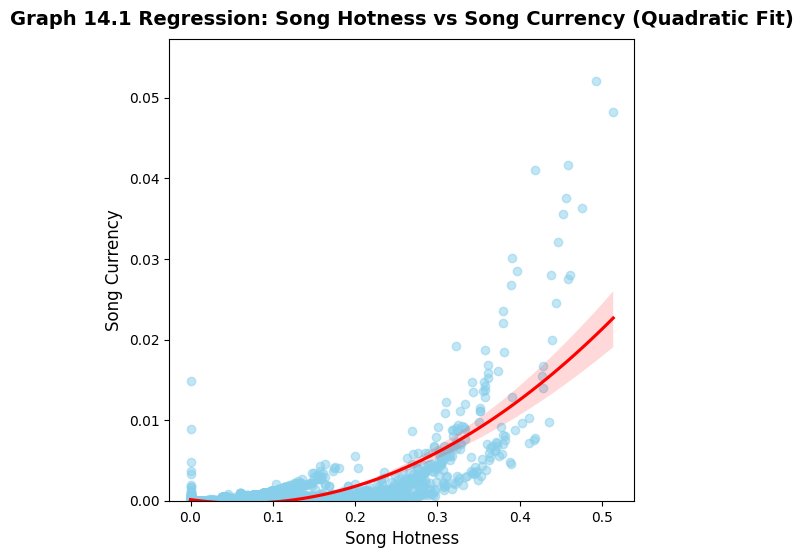

In [ ]:
# Extract the relevant data from the DataFrame
x = df_master_tidy['song_hotttnesss']
y = df_master_tidy['song_currency']

# Fit a 2nd-degree polynomial to the data
coefficients = np.polyfit(x, y, 2)
quadratic_function = np.poly1d(coefficients)

# Print the quadratic function
print(f"Quadratic Function: y = {coefficients[0]:.3f}x^2 + {coefficients[1]:.3f}x + {coefficients[2]:.3f}")

# Plotting the scatter plot with a quadratic regression line with axes swapped
plt.figure(figsize=(6, 6))
sns.regplot(x='song_hotttnesss', y='song_currency', data=df_master_tidy, color='skyblue', scatter_kws={'alpha': 0.5}, order=2, line_kws={"color": "red"})
plt.ylim(0, df_master_tidy['song_currency'].max() * 1.1)
plt.title('Graph 14.1 Regression: Song Hotness vs Song Currency (Quadratic Fit)', fontsize=14, fontweight='bold', pad=10)
plt.xlabel('Song Hotness', fontsize=12)
plt.ylabel('Song Currency', fontsize=12)
plt.show()

The graph 14.1 titled "Regression: Song Hotness vs Song Currency (Quadratic Fit)" shows a positive nonlinear relationship between Song Hotness and Song Currency using a scatter plot and a quadratic regression line. The red curve indicates that as Song Hotness increases, Song Currency also tends to rise, but at an accelerating rate, suggesting that songs with higher hotness experience disproportionately higher currency. Most data points are concentrated at lower values of both hotness and currency, but the upward trend implies that popularity boosts currency significantly for a select few songs. This trend supports the idea that popular songs gain greater visibility and rewards, leading to enhanced success in the music market.


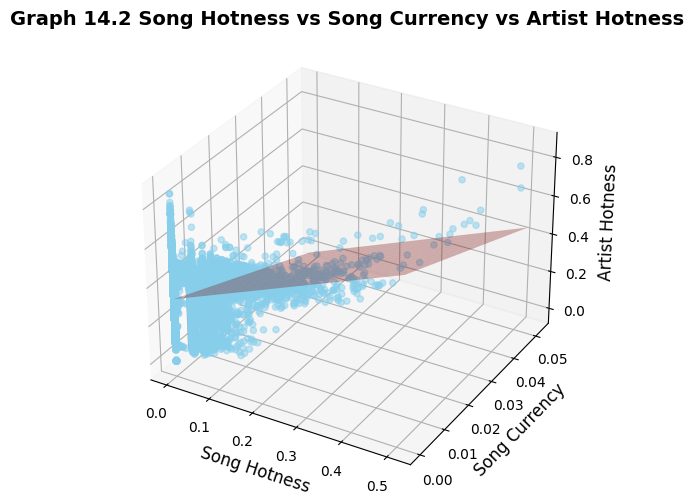

In [ ]:
x = df_master_tidy['song_hotttnesss']
y = df_master_tidy['song_currency']
z = df_master_tidy['artist_hotttnesss']
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='skyblue', alpha=0.5)
# Fitting a regression plane to the data
X = np.array([x, y]).T
Z = z
model = LinearRegression()
model.fit(X, Z)
x_surf, y_surf = np.meshgrid(np.linspace(x.min(), x.max(), 20), np.linspace(y.min(), y.max(), 20))
z_surf = model.intercept_ + model.coef_[0] * x_surf + model.coef_[1] * y_surf
ax.plot_surface(x_surf, y_surf, z_surf, color='r', alpha=0.3)
ax.set_title('Graph 14.2 Song Hotness vs Song Currency vs Artist Hotness', fontsize=14, fontweight='bold', pad=5)
ax.set_xlabel('Song Hotness', fontsize=12)
ax.set_ylabel('Song Currency', fontsize=12)
ax.set_zlabel('Artist Hotness', fontsize=12)
plt.show()

The graph 14.2 titled "Song Hotness vs Song Currency vs Artist Hotness" is a 3D scatter plot showing the relationship between Song Hotness, Song Currency, and Artist Hotness. The fitted regression plane indicates that both Song Hotness and Song Currency positively contribute to Artist Hotness, suggesting that popular songs with higher commercial value are associated with more popular artists. This highlights how the success of individual tracks can significantly influence the overall popularity of an artist.

####Do "song currency" and "song hotness" impact track listens?

In [ ]:
# Extract the relevant data from the DataFrame
x = df_master_tidy['song_hotttnesss']
y = df_master_tidy['song_currency']
size = df_master_tidy['track_listens']
color = df_master_tidy['track_listens']
trace = go.Scatter(x=x, y=y, mode='markers', marker=dict(size=size * 0.01, sizemode='area', color=color, colorscale='Viridis',
                                                         colorbar=dict(title='Track Listens'), opacity=0.5, line=dict(width=1)))
# Setting up the layout of the plot
layout = go.Layout(title=dict(text='Graph 15. Song Currency vs Song Hotness vs Track Listens', font=dict(size=16, color='black', weight='bold'), x=0.5),
                   xaxis=dict(title='Song Hotness'), yaxis=dict(title='Song Currency'), margin=dict(l=20, r=20, t=40, b=40))
fig = go.Figure(data=[trace], layout=layout)
fig.show()

The bubble chart titled "Song Currency vs. Song Hotness vs. Track Listens" illustrates the relationship between Song Hotness (x-axis) and Song Currency (y-axis), with each bubble representing a song. The size and color of the bubbles reflect the number of track listens, with larger and lighter bubbles indicating higher listen counts. While this visualization highlights the connection between song popularity, currency, and listens, it does not show a clear trend suggesting that Song Currency and Song Hotness significantly impact track listens.

## **Conclusion**

**Overview of the Analysis**

The analysis began with three main datasets: raw_tracks, raw_echonest, and raw_genres. After filtering and merging raw_tracks and raw_echonest into df_merged, we discovered over 160 music subgenres, which complicated our ability to gain a broader overview of the dataset. Each genre in raw_genres is linked to a parent genre, with some parent genres encompassing multiple subgenres (e.g., "International" contains 30 subgenres, "Rock" has 29, and "Electronic" has 19). Therefore, we decided to use only the 17 ultimate parent genres as the labels for each track. After merging df_merged with raw_genres into df_merged_genre, we addressed three main challenges:

* Missing Values: A significant 56.31% of entries in the language field were missing. For instrumental tracks without lyrics, these were replaced with the label "Pure."

* Random Missing Values: Missing values in Echonest features were removed from the dataset.

* Data Type Corrections: We corrected incorrect data types, such as converting track duration into seconds and ensuring that Echonest features were in float format. The final cleaned dataset was named df_master_tidy.

**Analysis Focus**

The analysis focuses on understanding the factors that potentially impact track listens. We hypothesized that four main influencing factors would be examined: track language (verbal or non-verbal), track duration, track genre, and track social features.

* **Part One: Track Language Analysis**

 In the first part of the analysis, we evaluated the influence of track language on listens. Graph 2.1 revealed that 56.3% of tracks are non-verbal ("Pure" music), while 41.9% feature English lyrics, and only 1.8% are in other languages. Further analysis of non-English tracks in Graph 2.2 indicated that Spanish, Portuguese, French, and Turkish are the most prevalent. Comparing verbal and non-verbal tracks, Graph 3 (box plot analysis) showed that listens for pure tracks are more variable, with a longer right tail compared to verbal tracks. Despite several prominent outliers in the verbal category, pure tracks generally achieved higher overall listen counts.

* **Part Two: Track Duration Analysis**

 In the second part of the analysis, we examined track duration. Graph 4 illustrated a right-skewed distribution, indicating that most tracks are relatively short (peaking at 0:12 - 8:20 minutes). The scatter plot in Graph 5, titled "Track Duration vs. Listens (Excluding Outliers)," suggested a weak positive correlation between duration and listens, indicating that track duration alone is not a strong predictor of popularity; both short and long tracks can achieve high listen counts.

* **Part Three: Track Genre Analysis**

 The third part of the analysis focused on the impact of track genre on listens. Due to tracks often having multiple genres, a new dataset was created with each genre listed separately for clearer analysis. Radar charts in Graph 6 revealed that most genres exhibit high instrumentalness and low speechiness, except for Spoken tracks. Genres like Electronic, Hip-Hop, and Rock demonstrated high danceability and energy, while Classical, Instrumental, and Jazz were more acoustic.

 Graph 7.1 (donut chart) indicated that 70% of tracks belong to a single genre, while only 23% span two genres. Graph 7.2 showcased that Rock and Electronic are the dominant genres, each featuring over 4,000 tracks, while other genres have fewer than 1,000. To assess genre popularity, a weighted average of listens was employed in Graph 8, highlighting Electronic and Rock as leaders, followed by Instrumental and Classical.

 Graph 9 displayed the top 10 tracks by listens, revealing that the top three exceed 300,000 listens, with the Electronic genre dominating the list with four tracks in the top 10. This suggests its widespread popularity. The next step is to analyze how the audio features of these popular Electronic tracks differ from the genre average to gain further insights into their success.

* **Part Four: Correlation Analysis of Audio Features**

 Graph 11.2 presented a correlation heatmap indicating that most audio features exhibit weak correlations with "track_listens," suggesting limited linear relationships. However, "danceability" and "valence" displayed relatively stronger positive correlations with listens, implying that tracks with higher values in these features tend to be more popular. Conversely, "acousticness" and "speechiness" were negatively correlated with popularity. Graph 12 reinforced this relationship, with a red regression line indicating that higher "danceability" is associated with a more positive tone.

 In the fourth part, Graph 13 examined the correlation between social features and track listens for the top 5 artists. It found that artists like Broke For Free, who have high Discovery and Familiarity scores, tend to garner more listens, highlighting the significance of social engagement in driving popularity. Graph 14.1 revealed a positive nonlinear relationship between Song Hotness and Song Currency, where increased popularity leads to disproportionately higher currency. Graph 14.2 (3D scatter plot) illustrated that both Song Hotness and Song Currency positively contribute to Artist Hotness, showcasing the influence of individual track success on an artist's overall popularity. Graph 15, a bubble chart, visualized the relationship between Song Hotness, Song Currency, and track listens, indicating connections but no clear trends suggesting a significant impact of these features on listens.

**Suggestions**

To succeed in today’s music industry, artists and professionals should prioritize a deep understanding of their audience while strategically leveraging social media. Engaging with fans on platforms like TikTok, Instagram, and YouTube is crucial for building a loyal following. By analyzing audience preferences and behaviors, artists can create content that resonates, such as music videos or relatable behind-the-scenes glimpses. Embracing viral trends and collaborating with influencers can further amplify reach. Tailoring promotions based on audience insights and monitoring engagement analytics will enable artists to refine their strategies. This audience-centric approach will enhance market presence, drive listens, and boost revenue in an increasingly competitive landscape.

**Future Research Directions**

The next phase of the analysis involves examining the impact of lyrics on market dynamics using advanced NLP techniques, such as sentiment analysis, thematic clustering, and trend analysis.

* Sentiment Analysis: This will determine the emotional tone of lyrics (e.g., love, sadness, rebellion) and their influence on audience engagement.

* Thematic Clustering: This will identify common lyrical themes, providing insights into what resonates with listeners.

* Time-Series Analysis: This will track the evolution of these themes over time, helping to correlate lyrical data with market features, such as genre popularity and social media metrics.

* By correlating lyrical content with track performance and audience engagement, we aim to gain deeper insights into how lyrics influence track popularity in the context of the evolving music landscape.




##**Challenges**

During this project, we faced several data challenges that impacted our analysis. After merging Tracks and Echonest datasets, we encountered issues with the hierarchy of music genres.
Another major issue was missing values for language information, affecting 56% of the data, especially for tracks without lyrics, which limited language-based analysis. We also had to handle random missing values in features by dropping NA rows, reducing our sample size to 15,000 tracks from over 100,000. Additionally, incorrect data types for features like track duration required standardization for accurate analysis.
These steps resulted in a df_master_tidy, but missing temporal data limited trend analysis. Linear regression also proved insufficient for capturing complex relationships, highlighting the need for machine learning models. Despite these challenges, our systematic data cleaning ensured a reliable dataset for meaningful insights.


## **References**

1. Michaël Defferrard, Kirell Benzi, Pierre Vandergheynst, Xavier Bresson. FMA: A Dataset For Music Analysis, 2017.
2. Get track’s audio features. Web API Reference | Spotify for Developers. (n.d.). https://developer.spotify.com/documentation/web-api/reference/get-audio-features
3. Admin. “The Impact of Social Media on Music Discovery.” Novecore Blog, 17 Aug. 2023, blog.novecore.com/impact-of-social-on-music-discovery/.
4. How song characteristics can affect song popularity. (n.d.). https://pages.github.coecis.cornell.edu/info2950-s23/project-skillful-starmie/eda.html
5. The impact of Music Distribution Services. Kami Records. (2023, June 24). https://kamirecords.co/the-impact-of-music-distribution-services/#:~:text=In%20the%20digital%20age%2C%20music,reach%20new%20heights%20of%20success.
6. Artist similarity, familiarity and Hotness. Music Machinery. (2009, May 25). https://musicmachinery.com/2009/05/25/artist-similarity-familiarity-and-hotness/

## **Generative AI disclosure statement:**

In completing this project, we have utilized Generative AI tools to assist with various aspects of our work. Below is a detailed account of how these tools were used:


*   Content Generation: We used ChatGPT to brainstorm ideas for plot choices and leverage the code content for specific problems we met, including taking genre_id information from the dictionary within pandas columns, dropping duplicated genre information in each row, and drawing the circle graphic indicating the parent genre with each subgenres.
*   Code Review and Debugging: We used ChatGPT to improve our Python code, including optimizing algorithms and resolving potential errors.
*   Proofreading and Grammar Checks: We used Grammarly to refine our writing, improve readability, and ensure grammatical accuracy.


Our team has reviewed, edited, and validated all AI-generated content to ensure its accuracy, relevance, and originality in accordance with academic integrity guidelines.
